# Exercise1

## Starting Point

We start osberving the data undertsanding that the information we need come from the 7th line till the end.

In [5]:
n = 0
with open("USA-road-d.CAL.gr", encoding='utf-8') as file:
    for line in file:
        if (n<10):
            print(line)
            n += 1

c 9th DIMACS Implementation Challenge: Shortest Paths

c http://www.dis.uniroma1.it/~challenge9

c TIGER/Line graph USA-road-d.CAL

c

p sp 1890815 4657742

c graph contains 1890815 nodes and 4657742 arcs

c

a 1 1048577 456

a 1048577 1 456

a 2 1048578 2389



In [6]:
n = 0
with open("USA-road-t.CAL.gr", encoding='utf-8') as file:
    for line in file:
        if (n<10):
            print(line)
            n += 1

c 9th DIMACS Implementation Challenge: Shortest Paths

c http://www.dis.uniroma1.it/~challenge9

c TIGER/Line graph USA-road-t.CAL

c

p sp 1890815 4657742

c graph contains 1890815 nodes and 4657742 arcs

c

a 1 1048577 1139

a 1048577 1 1139

a 2 1048578 5972



Let's see the structure. It seems that splitting the lines we have easily the informations we need and this will work for all three files. So let's start!

In [7]:
n = 0
with open("USA-road-d.CAL.co", encoding='utf-8') as file:
    for line in file:
        if (n>6 and n<16):
            ww = line.split()
            print(line)
            print(ww)
        n += 1

v 1 -114315309 34133550

['v', '1', '-114315309', '34133550']
v 2 -114223946 34176221

['v', '2', '-114223946', '34176221']
v 3 -114307299 34148791

['v', '3', '-114307299', '34148791']
v 4 -114318765 34138889

['v', '4', '-114318765', '34138889']
v 5 -114347300 34042614

['v', '5', '-114347300', '34042614']
v 6 -114347162 34058931

['v', '6', '-114347162', '34058931']
v 7 -114126950 33988170

['v', '7', '-114126950', '33988170']
v 8 -114347268 34028261

['v', '8', '-114347268', '34028261']
v 9 -114340613 34042519

['v', '9', '-114340613', '34042519']


So the structure is pretty clear, we start in row 7 and listing them we can access to the info explained in the exercise text.

Now We start creating ex2, where we will just continue reading these 3 files and in the meantime we will save the info as nodes, arcs, latitudes and longitudes, distances d and distances t in our big Graph structure.

# Exercise2

# Imports 

In [3]:
from collections import defaultdict
import itertools
import sys
import random
import networkx as nx
import matplotlib.pyplot as plt

# Intoduction to the Class Graph

We created a Class Graph that had in itself.<br> A dictionary with key=node, values=nodes adjacents to the node (self.adjacency).<br>A dictionary of coordinates with key=node, value=[lat, long] (self.coordinates).<br>A dict of lists with key=node, values=list of adjiancent nodes i and distances (i,node) in the form node:[[i,d_inode],...] (self.adj_list_d,t or n in base of the kind of distance utilized). <br>
To make all this we used object orientd programming united with functional programming(the "kind" for example you find the the dijsktrafor2,3,4 and the functionalities).

## What did we do?<br>
For functionality1 we just performed a bfs, in regard at the cited distance.<br>
For functionality2 we had in mind the Prim's algorithm so the idea was, we find the nearest two nodes, then we add paths to our lis of path from the closest nodes that remain to be visited, and so on, printin in the end a list. For example if we had nodes 1,2,3,4 and 1,2 where the closest, we seek for the closest to 1 or 2 and add the edges of this path, let's say node4, so now we have nodes 1, 2, 3 visited and remain 4, we select the mionimum distance to 1,2 or 3 and add the edges, in the end make a list(set(edges)) to avoid repetitions and we are done.<br>
For functionality3 we used dijsktra(our dijsktra select the smartes path between two nodes) in order for every two nodes given and print out the path as edges.<br>
For functionality4 we did a little variations of functionality2 with this time a fiex starting point and end point, but the idea is the same. When the user gives more than 7 nodes, we willapply and euristic approach, sampling from the combinations of nodes (except start and end) and assessing in 450 tries a local minimum. This method could certantly be wrong, but for sure will give a local minimum and will not overload the memory.

In [7]:
class Graph(object):
    '''
    Graph Data Structure, undirected 
    '''
    
    def __init__(self):
        self.adjacency = defaultdict(set)
        self.coordinates = {}
        self.adj_list_d = defaultdict(list)
        self.adj_list_t = defaultdict(list)
        self.adj_list_n = defaultdict(list)
        
    def add(self, node1, node2):
        ''' Add connection between node1, node2'''
        self.adjacency[int(node1)].add(int(node2))
        self.adjacency[int(node2)].add(int(node1))
        #self.net[int(node1), int(node2)] = 1
    
    def distance(self, node1, node2, d):
        ''' Create the distance measure between node1 and node2 '''
        #self.dis[(int(node1), int(node2))] = int(d)
        if [int(d), int(node2)] not in self.adj_list_d[int(node1)]:
            self.adj_list_d[int(node1)].append([int(d), int(node2)])
            self.adj_list_d[int(node2)].append([int(d), int(node1)])
            self.adj_list_n[int(node1)].append([1, int(node2)])
            self.adj_list_n[int(node2)].append([1, int(node1)])
        
    def time(self, node1, node2, t):
        ''' Create the time distance measure between node 1 and node 2'''
        
        #self.tim[(int(node1), int(node2))] = int(t)
        if [ int(t), int(node2)] not in  self.adj_list_t[int(node1)]:
            self.adj_list_t[int(node1)].append([ int(t), int(node2)])
            self.adj_list_t[int(node2)].append([int(t), int(node1)])
        
    def coordinate(self, node, coordinate1, coordinate2):
        '''Save the coordinates of every node'''
        self.coordinates[int(node)] = [int(coordinate1), int(coordinate2)]
    
    def nodes_(self):
        ''' All the nodes of the graph '''
        return list(set(self.adjacency.keys()))
    
    def edges(self):
        ''' Return all the edges of the graph '''
        return list(self.dis.keys())
    
    def print_adj_list_d(self):
        for keys, values in self.adj_list_d.items():
            print(keys, values)
            
    def print_adj_list_t(self):
        for keys, values in self.adj_list_d.items():
            print( keys, values)
            
            
    ''' We can usedfs 
             because running all the tree we can find the connected component with one node or just did for fun :)
     '''   
    def dfs(self, startnode, visited, kind): #kind is a function that will be used to recall self.adj_list_d,t or n in base of the user request
        if visited is None:
            visited = set() 
        visited.add(startnode)
        for i in kind[startnode]:
            if i[1] not in visited:
                    self.dfs(i[1], visited, kind)
        return visited
    
    
    '''We use BFS because it returns the minimal graph from a starting point, and because
    we care about <=distance we modified the algo to work with the weights'''
    def bfs(self, startnode, dist, kind):
        visited = []
        queue = [startnode]
        distqueue = [0]
        while queue:
            node = queue.pop(0)
            dqueue = distqueue.pop(0)
            if dqueue <= dist and node not in visited:
                visited.append(node)
                if dqueue <= dist:
                    for neigh in kind[node]:
                        queue.append(neigh[1])
                        distqueue.append(neigh[0]+dqueue)
        return visited
    
    
    '''the functionality uses functional programming to call the kind of dictionaries associated with the distances
    this will happend for every functionality'''           
    def functionality1(self):
        startnode = int(input("Give me the node as a number  \n "))
        measure = int(input("We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  \n "))
        dist = int(input("Put a number as threshold distance: \n "))
        if measure == 1:
            return (self.bfs(startnode, dist, self.adj_list_d), measure)
        elif measure == 2:
            return (self.bfs(startnode, dist, self.adj_list_t), measure)
        elif measure == 3 :
            return (self.bfs(startnode, dist, self.adj_list_n),measure)
        
        
    '''Algo inspired by Prim algoritms for mst  '''  
    def mst(self, nodes, kind):
        n = len(nodes)
        originals = nodes
        tree = []
        nodesfixed = []
        minweight = sys.float_info.max
        tempath = []
        for i in range(n):
                for j in range(i+1, n):
                    A, B = self.dijsktra(nodes[i], nodes[j], kind)
                    if B != []:
                        #print(B)
                        if B < minweight:
                            minweight = B
                            temporary = [nodes[i],nodes[j]]
                            tempath = A
        if minweight == sys.float_info.max:
            return('NO PATH POSSIBLE; TOTALLY DISCONNECTED NODES')
        for h in tempath:
            tree.append(h)
        for x in temporary:
            nodesfixed.append(x)
        nn = []
        for no in nodes:
            if no not in temporary:
                nn.append(no)
        nodes = nn
        if n>2:
            while(nodes != []):
                minweight = sys.float_info.max
                tempath = []
                for i in nodesfixed:
                    for j in nodes:
                        A, B = self.dijsktra(i, j, kind) 
                        if B != []:
                            if B < minweight:
                                minweight = B
                                temporary = [j]
                                tempath = A
                if minweight ==  sys.float_info.max:
                    return ("The nodes are not all connected, this is the tree we could achieve, and the nodes disconnected from the one we took as starting points",list(set(tree)))
                for h in tempath:
                    tree.append(h)
                for x in temporary:
                    nodesfixed.append(x)
                nn = []
                for no in nodes:
                    if no not in temporary:
                        nn.append(no)
                nodes = nn
            return list(set(tree))
         
    def functionality2(self):
        startnodes = [int(x) for x in input('Write the nodes, each one spaced from the other.  ').split()]
        measure = int(input("We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  \n "))
       # connectedcomp = self.dfs(startnodes[0], None, self.adj_list_n)
      #  rdn = random.choiche(connectedcomp)
        if measure == 1:
            return (self.mst(startnodes, self.adj_list_d), startnodes, measure)
        elif measure == 2:
            return (self.mst(startnodes,self.adj_list_t), startnodes, measure)
        elif measure == 3 :
            return (self.mst(startnodes,self.adj_list_n), startnodes, measure)
    
    '''This Dijsktra return a list of nodes that you will touch in the minimum path.
    The code works exactly like the dijsktra method renewing each time the weight and predecessor of a node. 
    We point the attention that the weights are always counted for all the path, so every node
    in shortest_paths will have a weight associated to a path, not only a couple of nodes'''
    def dijsktra(self, initial, end, kind):
    # shortest paths is a dict of nodes
    # whose value is a tuple of (previous node, weight)
        shortest_paths = {initial: (None, 0)}
        current_node = initial
        visited = set()
    
        while current_node != end:
            visited.add(current_node)
            destinations = kind[current_node]
            weight_to_current_node = shortest_paths[current_node][1]

            for next_node in destinations:
                weight = next_node[0] + weight_to_current_node
                if next_node[1] not in shortest_paths:
                    shortest_paths[next_node[1]] = (current_node, weight)
                else:
                    current_shortest_weight = shortest_paths[next_node[1]][1]
                    if current_shortest_weight > weight:
                        shortest_paths[next_node[1]] = (current_node, weight)
            next_destinations = {node: shortest_paths[node] for node in shortest_paths if node not in visited}
            if not next_destinations:
               # return "Route Not Possible" as a [] that later on will be checked if it remains so
                return [],[]
        # next node is the destination with the lowest weight in the second component
            current_node = min(next_destinations, key=lambda k: next_destinations[k][1])
           
    
    # Work back through destinations in shortest path
        path = []
        while current_node is not None:
            path.append(current_node)
            next_node = shortest_paths[current_node][0]
            current_node = next_node
        
        path = path[::-1]
        tup = []
        for i in range(len(path)-1):
            tup.append((path[i], path[i+1]))
        return tup, shortest_paths[end][1]
    '''Sometimes the order opath does not exist for not connection of the nodes'''
    def dijsktrafor3(self, startnode, nodes, kind):
        nodi = [startnode]
        for i in nodes:
            nodi.append(i)
        final_path = []
        final_weight = 0
        to_print = []
        for i in range(len(nodi)-1):
            A, B = self.dijsktra(nodi[i], nodi[i+1], kind)
            if A == []:
                    return 'No path ordered allowed'
            final_weight += B
            final_path.append(A)
        for i in final_path:
            for j in i:
                to_print.append(j)
        return to_print
    
    def functionality3(self):
        H_n = int(input('Write the number associated to the starting node.  \n'))
        startnodes = [int(x) for x in input('Write the nodes, each one spaced from the other.  \n').split()]
        measure = int(input("We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  \n "))
        if measure == 1:
            return (self.dijsktrafor3( H_n, startnodes, self.adj_list_d), H_n, startnodes, measure)
        elif measure == 2:
            return (self.dijsktrafor3( H_n, startnodes, self.adj_list_t), H_n, startnodes, measure)
        elif measure == 3 :
            return (self.dijsktrafor3( H_n, startnodes, self.adj_list_n), H_n, startnodes, measure)
        
    def dijsktrafor4(self, startnode, nodes, endnode, kind):  
        n = len(nodes)
        final_path = []
        weight_final = sys.float_info.max 
        if n > 5:
            random.seed(123)
            print('The nodes are more than 7, so we use an euristic approach based on random samples, that will give an approximate local minimum for our datasets')
            for j in range(300):
                obj = [startnode]
                for k in random.sample(nodes, n):
                    obj.append(k)
                obj.append(endnode)
                path = []
                weight = 0
                lenpath = 0
                for j in range(len(obj)-1):
                    A, B = self.dijsktra(obj[j], obj[j+1], kind)
                    if A == []:
                        break
                    path.append(A)
                    weight = weight + B
                if weight < weight_final:
                    weight_final = weight
                    final_path = path    
        else:
            #here all the permutations of the order of the nodes
            permuTuples = list(itertools.permutations(nodes))
            final_path = []
            weight_final = sys.float_info.max 
            for i in permuTuples:
                obj = [startnode]
                for k in i:
                    obj.append(k)
                obj.append(endnode)
                path = []
                weight = 0
                lenpath = 0
                for j in range(len(obj)-1):
                    A, B = self.dijsktra(obj[j], obj[j+1], kind)
                    if A == []:
                        break
                    path.append(A)
                    weight = weight + B
                if weight < weight_final:
                    weight_final = weight
                    final_path = path
        to_print = []
        #print(final_path)
        if final_path == []:
            return ("No path possible")
        for i in final_path:
               for j in i:
                    to_print.append(j)
        return to_print    
        
    def functionality4(self):
        H_n = int(input('Write the number associated to the starting node.  \n'))
        startnodesd = [int(x) for x in input('Write the nodes, each one spaced from the other, remember the last one will be always our end point.  \n').split()]
        endnode = startnodesd[-1]
        startnodes = startnodesd[:-1]
        measure = int(input("We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  \n "))
        if measure == 1:
            return (self.dijsktrafor4( H_n, startnodes, endnode, self.adj_list_d), H_n, startnodesd, measure)
        elif measure == 2:
            return (self.dijsktrafor4( H_n, startnodes, endnode, self.adj_list_t), H_n, startnodesd, measure)
        elif measure == 3 :
            return (self.dijsktrafor4( H_n, startnodes, endnode, self.adj_list_n), H_n, startnodesd, measure)
        
    import warnings
    warnings.filterwarnings("ignore", category=UserWarning)
    ''' Ignore warnings just because there is a annoying warning about a function that will be deprecated in networkx'''
        
    def visualization1(self):
        # make the space for our graph bigger
        plt.figure()
        plt.figure(figsize=(30,30))
        # create a new graph for plotting
        I = nx.Graph()
        f_1, m = self.functionality1()
        # f_1 the list of nodes in distance and m the metric used
        for ele in list(f_1):
            I.add_node(ele)
            I.add_edge(list(f_1)[0], ele) # the edge from the first node to all the others
        # make two attributes for the nodes, their name and coordinates
        pos = {}
        labels = {}
        for node in I.nodes():
            pos[node] = ( self.coordinates[node][0] , self.coordinates[node][1])
            labels[node] = str(node)
        source = list(f_1)[0]
        nx.draw_networkx_labels(G, pos, labels, font_size= 16 , alpha = 0.5)
        # a special colour for the starting point
        nx.draw_networkx_nodes(I, pos, nodelist=[source], node_color="crimson", node_size = 500)
        # all the nodes connected to the starting point in corresponding distance
        nx.draw_networkx_nodes(I, pos, nodelist=list(set(I.nodes()).difference({source})), node_color="moccasin")
        # check which metric is used and use the corresponding colous
        if m == 1:
            nx.draw_networkx_edges(I, pos, edge_color = "olive", width  = 2)
        elif m == 2:
            nx.draw_networkx_edges(I, pos, edge_color = "mediumaquamarine", width =2)
        elif m == 3:
            nx.draw_networkx_edges(I, pos, edge_color = "lightslategrey", width  = 2)
        plt.show()
        
    def visualization2(self):
        f = self.functionality2()
        if f[0] == None:
            return("There is no path")
        if type(f[0]) == str:
            # if there is no path
            return(f[0])
        elif type(f[0]) == tuple:
            # if the path is lacking some nodes
            f_2 = f[0][1]
            print(f[0][0])
        elif type(f[0]) == list :
            # list of edges in the path
            f_2 = f[0]
        # starting node
        start = f[1]
        #metric
        m = f[2]
        # create a new graph for plotting
        I = nx.Graph()
        for ele in f_2:
            I.add_node(ele[0])
            I.add_node(ele[1])
            I.add_edge(ele[0], ele[1])
        # make two attributes for the nodes, their name and coordinates
        labels = {}
        pos = {}
        for node in I.nodes():
            pos[node] = ( self.coordinates[node][0] , self.coordinates[node][1])
            labels[node] = str(node)
        # make the space for our graph bigger
        plt.figure()
        plt.figure(figsize=(30,30)) 
        # have a label only for the nodes given to us, and not for all those in the path 
        nx.draw_networkx_labels(G, pos, labels = {n:lab for n,lab in labels.items() if n in start}, 
                            font_size= 16 , alpha = 0.8)
        # all the other nodes
        nx.draw_networkx_nodes(I, pos, nodelist=list(set(I.nodes()).difference(set(start))), node_color="lavender", node_size = 5)
        # the main nodes of the network
        nx.draw_networkx_nodes(I, pos, nodelist=start, node_color="moccasin", node_size = 400)
        # check which metric is used and use the corresponding colous
        if m == 1:
            nx.draw_networkx_edges(I, pos, edge_color = "olive", width  = 2)
        elif m == 2:
            nx.draw_networkx_edges(I, pos, edge_color = "mediumaquamarine", width  = 2)
        elif m == 3:
            nx.draw_networkx_edges(I, pos, edge_color = "lightslategrey", width  = 2)
        plt.show()
        
    def visualization3(self):
        # create a new graph for plotting
        I = nx.Graph()
        f = self.functionality3()
        if f[0] == [] or f[0] == None:
            return 'There is no path ordered'
        if type(f[0]) == str:
            # if there is no path 
            return f_3[0]
        # the edges of the path 
        f_3 = f[0]
        #the starting node
        start_nodes = f[1]
        # all the other nodes
        nodes = f[2]
        # metric
        m = f[3]
        for ele in f_3:
            I.add_node(ele[0])
            I.add_node(ele[1])
            I.add_edge(ele[0], ele[1])
        # make two attributes for the nodes, their name and coordinates
        labels = {}
        pos = {}
        for node in I.nodes():
            pos[node] = ( self.coordinates[node][0] , self.coordinates[node][1])
            labels[node] = str(node)
        # make the space for our graph bigger
        plt.figure()
        plt.figure(figsize=(30,30)) 
        al = nodes
        al.append(start_nodes)
        nx.draw_networkx_labels(G, pos, labels = {n:lab for n,lab in labels.items() if n in al}, 
                                font_size= 16 , alpha = 0.8)
        nx.draw_networkx_nodes(I, pos, nodelist=list(set(I.nodes()).difference(set(al))), node_color="lavender", node_size = 5)
        nx.draw_networkx_nodes(I, pos, nodelist=nodes, node_color="moccasin", node_size = 400)
        # a special colour for the starting point
        nx.draw_networkx_nodes(I, pos, nodelist=[start_nodes], node_color="crimson", node_size = 500)
        # check which metric is used and use the corresponding colous
        if m == 1:
            nx.draw_networkx_edges(I, pos, edge_color = "olive", width  = 2)
        elif m == 2:
            nx.draw_networkx_edges(I, pos, edge_color = "mediumaquamarine", width  = 2)
        elif m == 3:
            nx.draw_networkx_edges(I, pos, edge_color = "lightslategrey", width  = 2)
        plt.show()
        
    def visualisation4(self):
        # create a new graph for plotting
        I = nx.Graph()
        f = self.functionality4()
        if f[0] == None:
            return 'No path allowed'
        if f[0]==[]:
            return 'There is no path, probably disconnected nodes'
        if type(f[0]) == str:
            return f[0]
        # the edges of the path 
        f_4 = f[0]
        # the starting node
        start_nodes = f[1]
        # all the other nodes
        nodes = f[2]
        # metric
        m = f[3]
        for ele in f_4:
            I.add_node(ele[0])
            I.add_node(ele[1])
            I.add_edge(ele[0], ele[1])
        # make two attributes for the nodes, their name and coordinates
        labels = {}
        pos = {}
        for node in I.nodes():
            pos[node] = ( self.coordinates[node][0] , self.coordinates[node][1])
            labels[node] = str(node)
        # make the space for our graph bigger
        plt.figure()
        plt.figure(figsize=(30,30)) 
        al = nodes
        al.append(start_nodes)
        nx.draw_networkx_labels(G, pos, labels = {n:lab for n,lab in labels.items() if n in al}, 
                                    font_size= 16 , alpha = 0.8)
        nx.draw_networkx_nodes(I, pos, nodelist=list(set(I.nodes()).difference(set(al))), node_color="lavender", node_size = 5)
        nx.draw_networkx_nodes(I, pos, nodelist=nodes, node_color="moccasin", node_size = 400)
        # a special colour for the starting point
        nx.draw_networkx_nodes(I, pos, nodelist=[start_nodes], node_color="crimson", node_size = 500)
        # check which metric is used and use the corresponding colous
        if m == 1:  
            nx.draw_networkx_edges(I, pos, edge_color = "olive", width  = 2)
        elif m == 2:
            nx.draw_networkx_edges(I, pos, edge_color = "mediumaquamarine", width  = 2)
        elif m == 3:
            nx.draw_networkx_edges(I, pos, edge_color = "lightslategrey", width  = 2)
        plt.show()
        
    def GraphandPlot(self):
        what_functionality = input("What functionality would you like to run? \n")
        if what_functionality == "1":
            return self.visualization1()
        elif what_functionality == "2":
            return self.visualization2()
        elif what_functionality == "3":
            return self.visualization3()
        elif what_functionality == "4":
            return self.visualisation4()
        else:
            print("We don't have this functionality yet. Try from 1 to 4!")



# Read the data

#### Previewing the data, we notice that the first 7 rows are an introduction and an a prologue for the data that follows, so we skip these

In [8]:
G = Graph()
with open(r"USA-road-d.CAL.gr", encoding='utf-8') as file:
    n = 0
    for line in file:
        if n > 6 :
            ww = line.split()
            G.add(ww[1], ww[2])
            G.distance(ww[1], ww[2], ww[3])
        n += 1
with open(r"USA-road-t.CAL.gr", encoding='utf-8') as file:
    n = 0
    for line in file:
        if n > 6 :
            ww = line.split()
            G.add(ww[1], ww[2])
            G.time(ww[1], ww[2], ww[3])
        n += 1
with open(r"USA-road-d.CAL.co", encoding='utf-8') as file:
    n = 0
    for line in file:
        if n > 6 :
            ww = line.split()
            G.coordinate(ww[1], ww[2], ww[3])
        n += 1

# Function for easy access 

We created a function that will access the functionalities and plottings of the class graph, this will be used by the user, it's been builted in the class so we will have to call her with G.GraphandPlot().

In [14]:
def GraphandPlot():
    what_functionality = input("What functionality would you like to run? \n")
    if what_functionality == "1":
        return G.visualization1()
    elif what_functionality == "2":
        return G.visualization2()
    elif what_functionality == "3":
        return G.visualization3()
    elif what_functionality == "4":
        return G.visualisation4()
    else:
        print("We don't have this functionality yet. Try from 1 to 4!")

# Examples

## Here we run functionality1 and plotting!

What functionality would you like to run? 
1
Give me the node as a number  
 123
We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  
 1
Put a number as threshold distance: 
 7819


<Figure size 432x288 with 0 Axes>

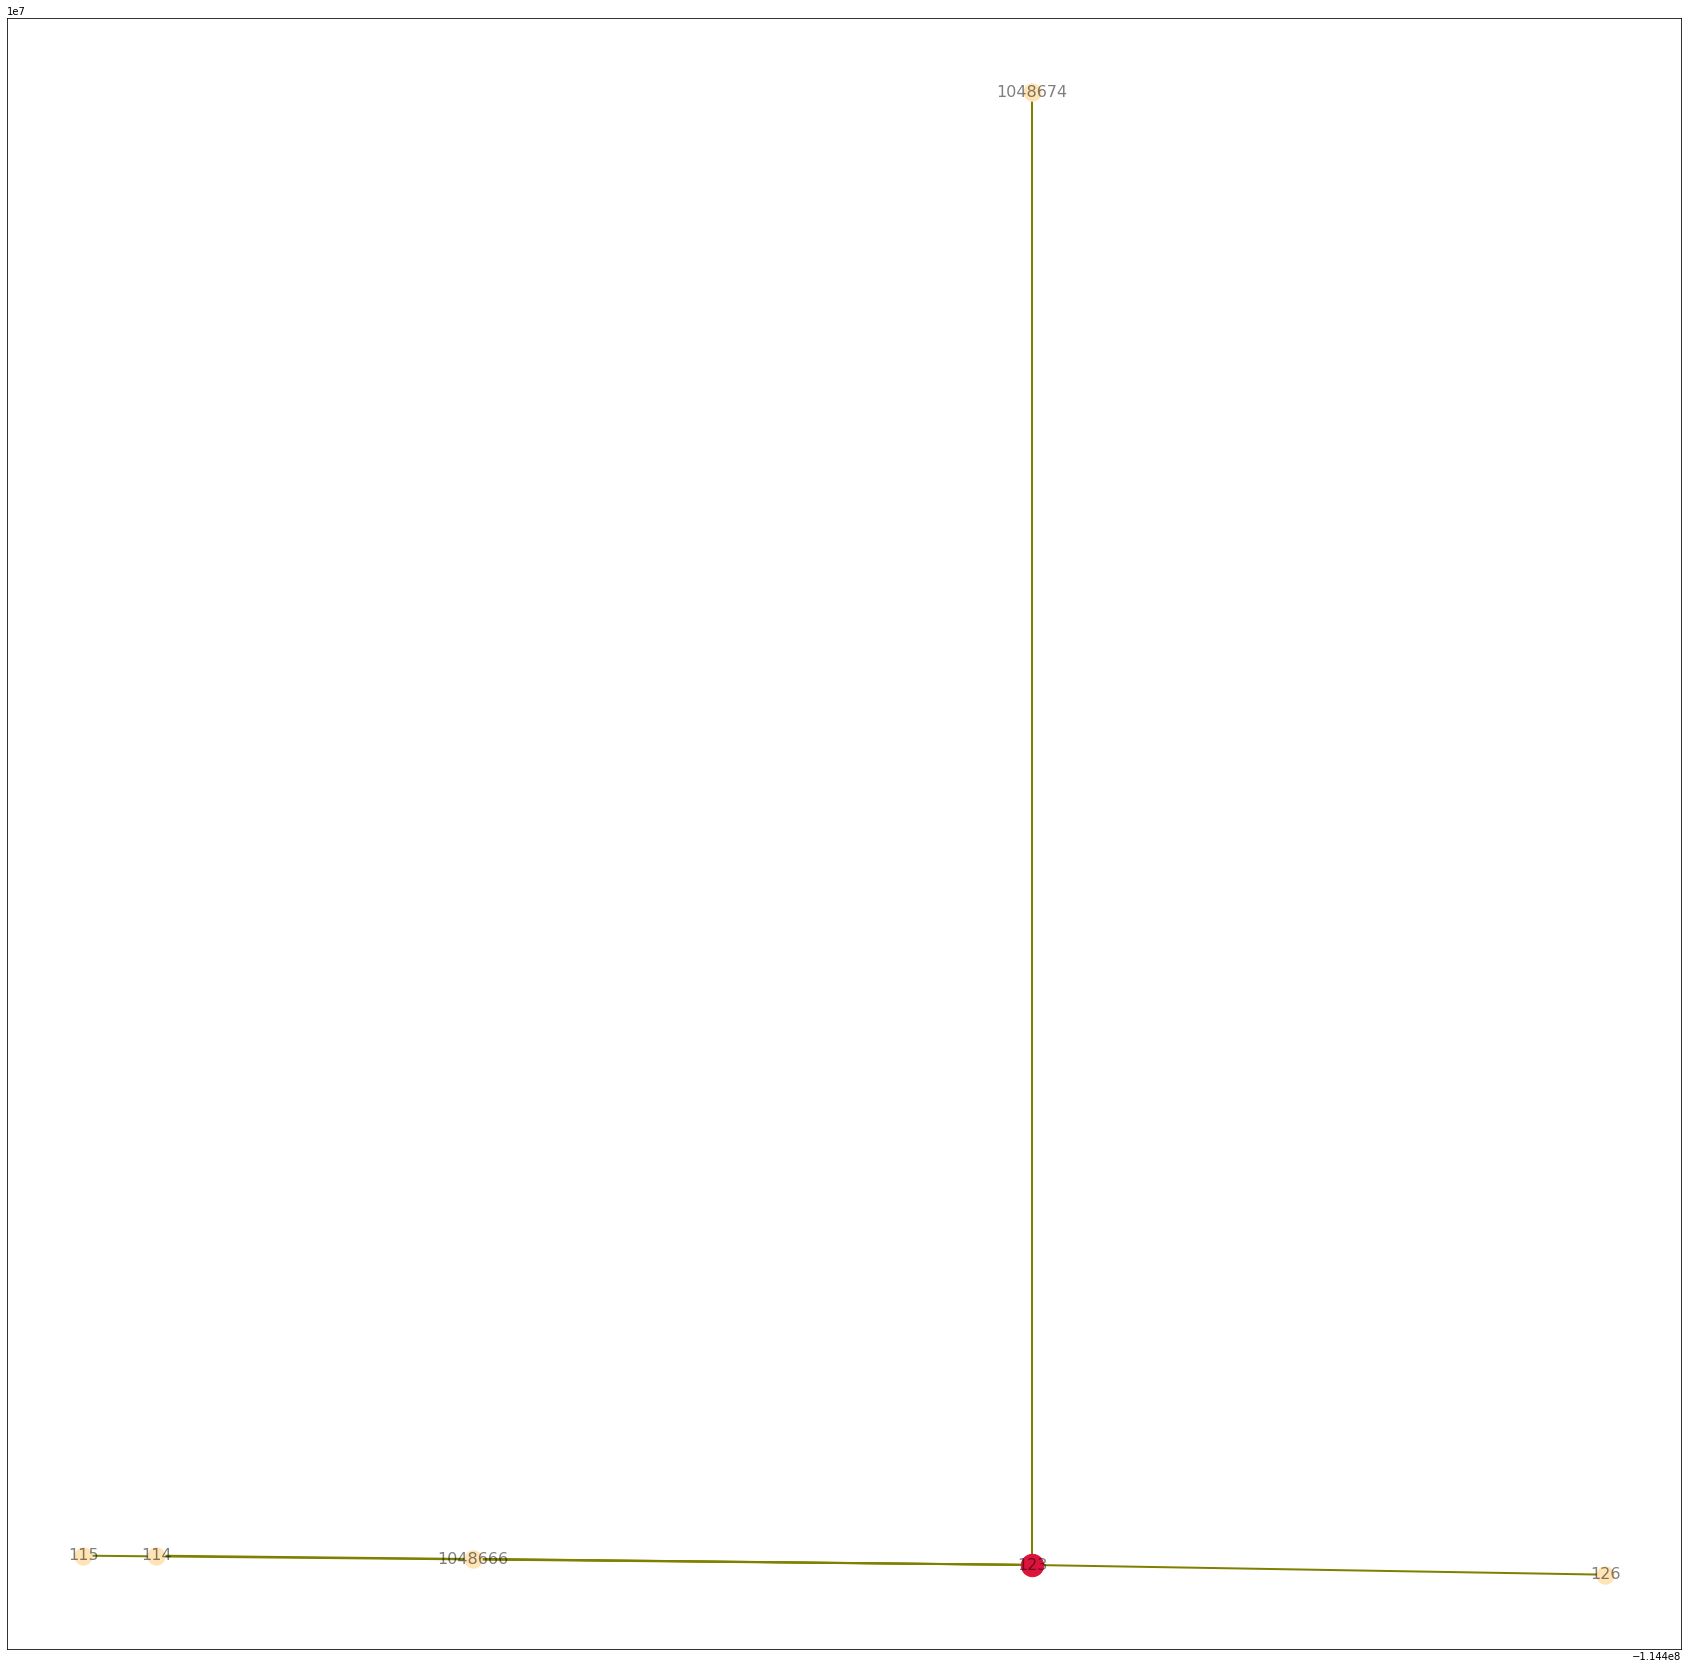

In [15]:
G.GraphandPlot()

What functionality would you like to run? 
1
Give me the node as a number  
 123
We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  
 2
Put a number as threshold distance: 
 99999


<Figure size 432x288 with 0 Axes>

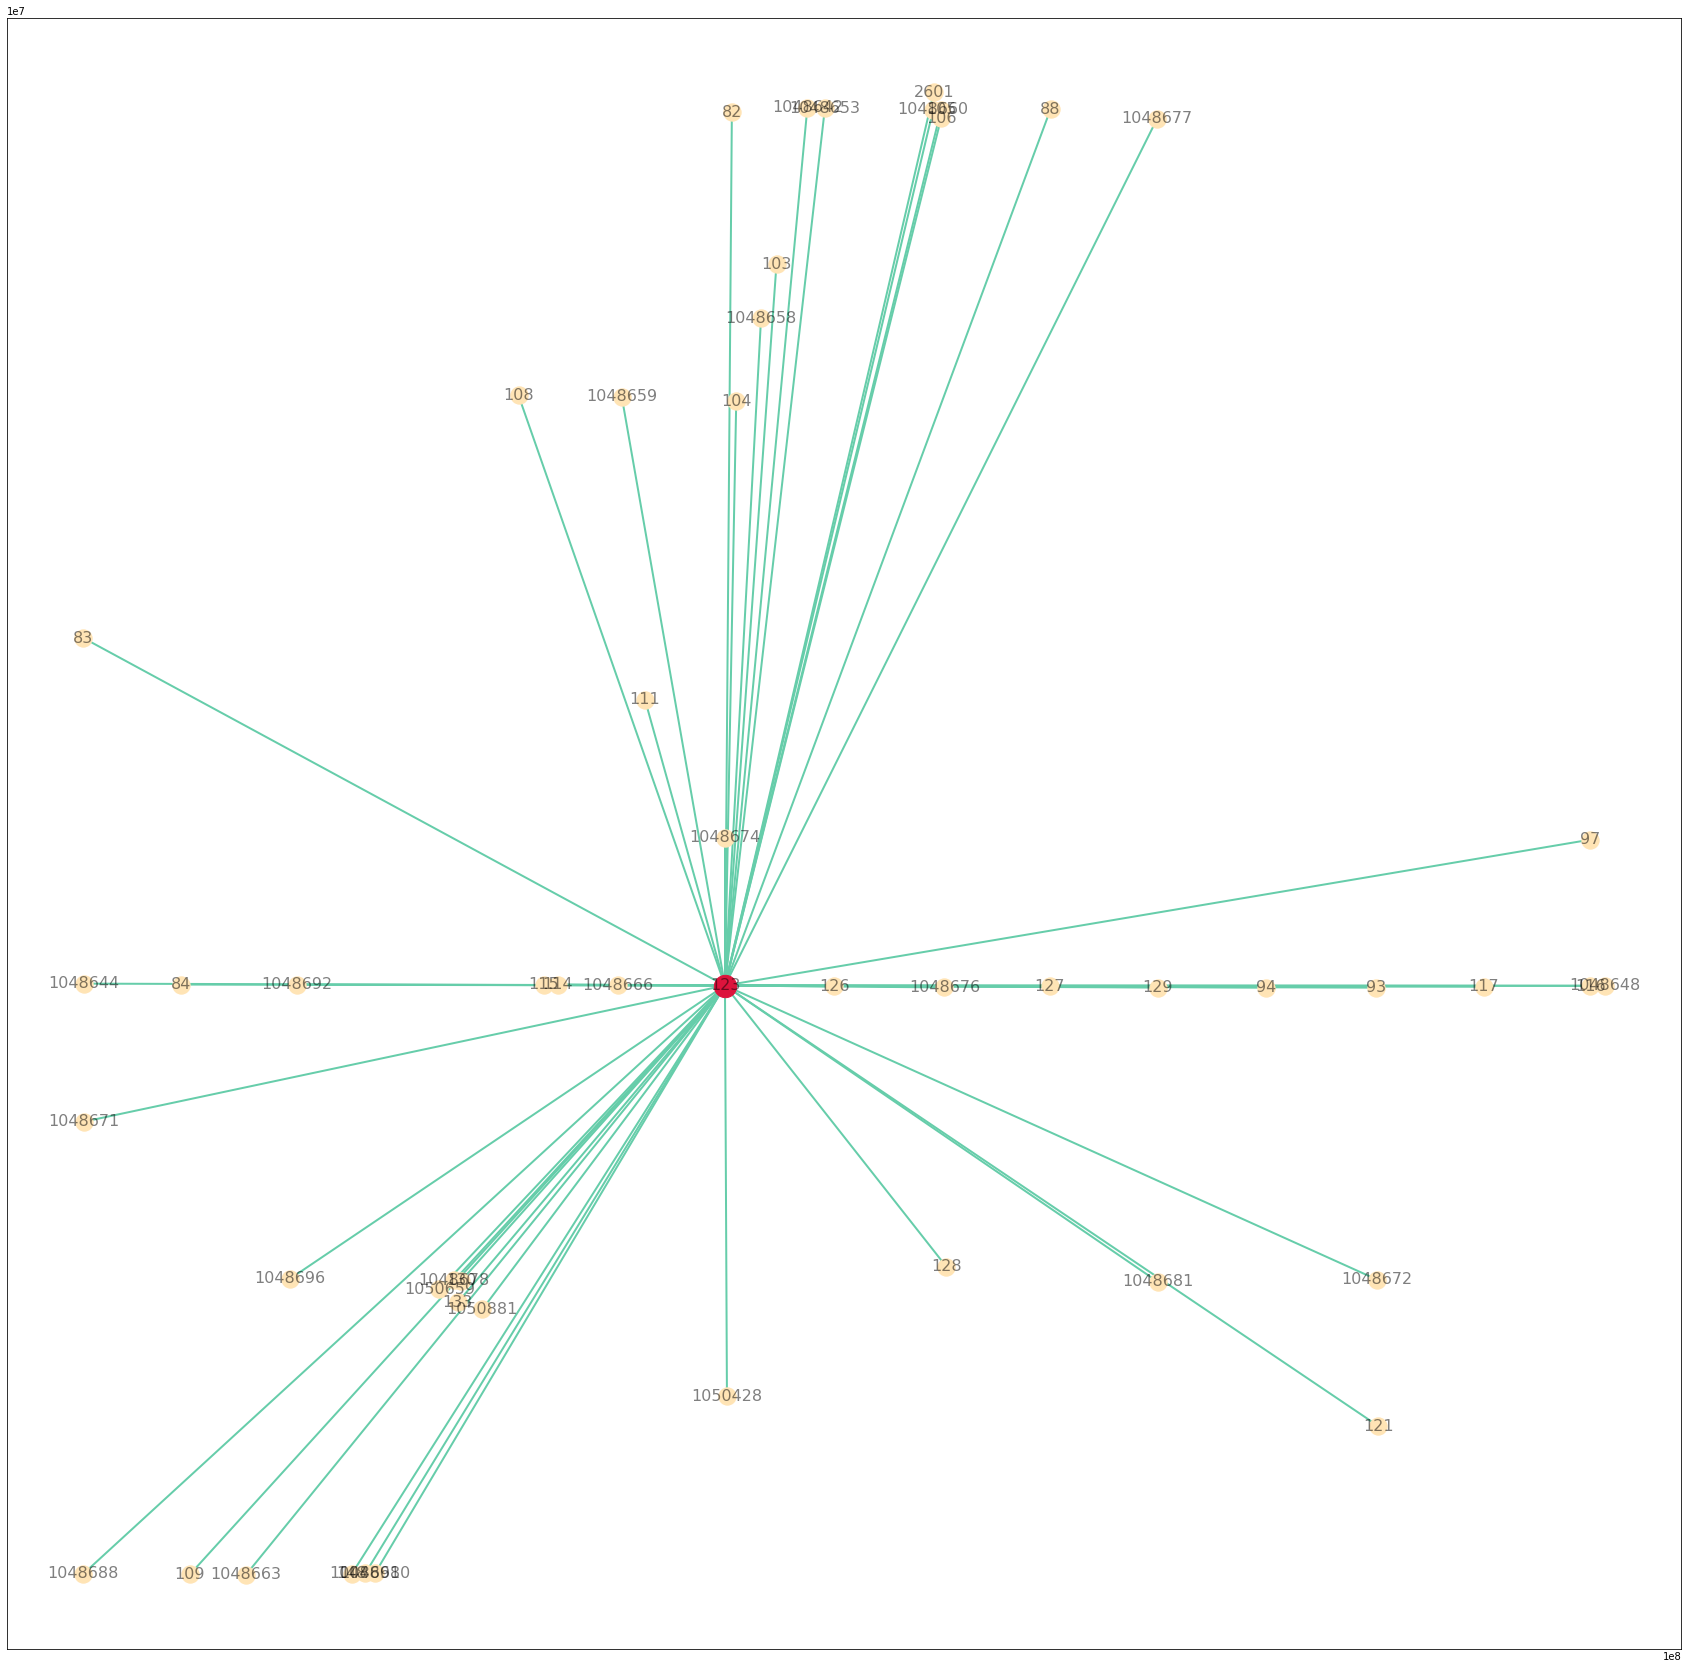

In [18]:
G.GraphandPlot()

What functionality would you like to run? 
1
Give me the node as a number  
 123
We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  
 3
Put a number as threshold distance: 
 12


<Figure size 432x288 with 0 Axes>

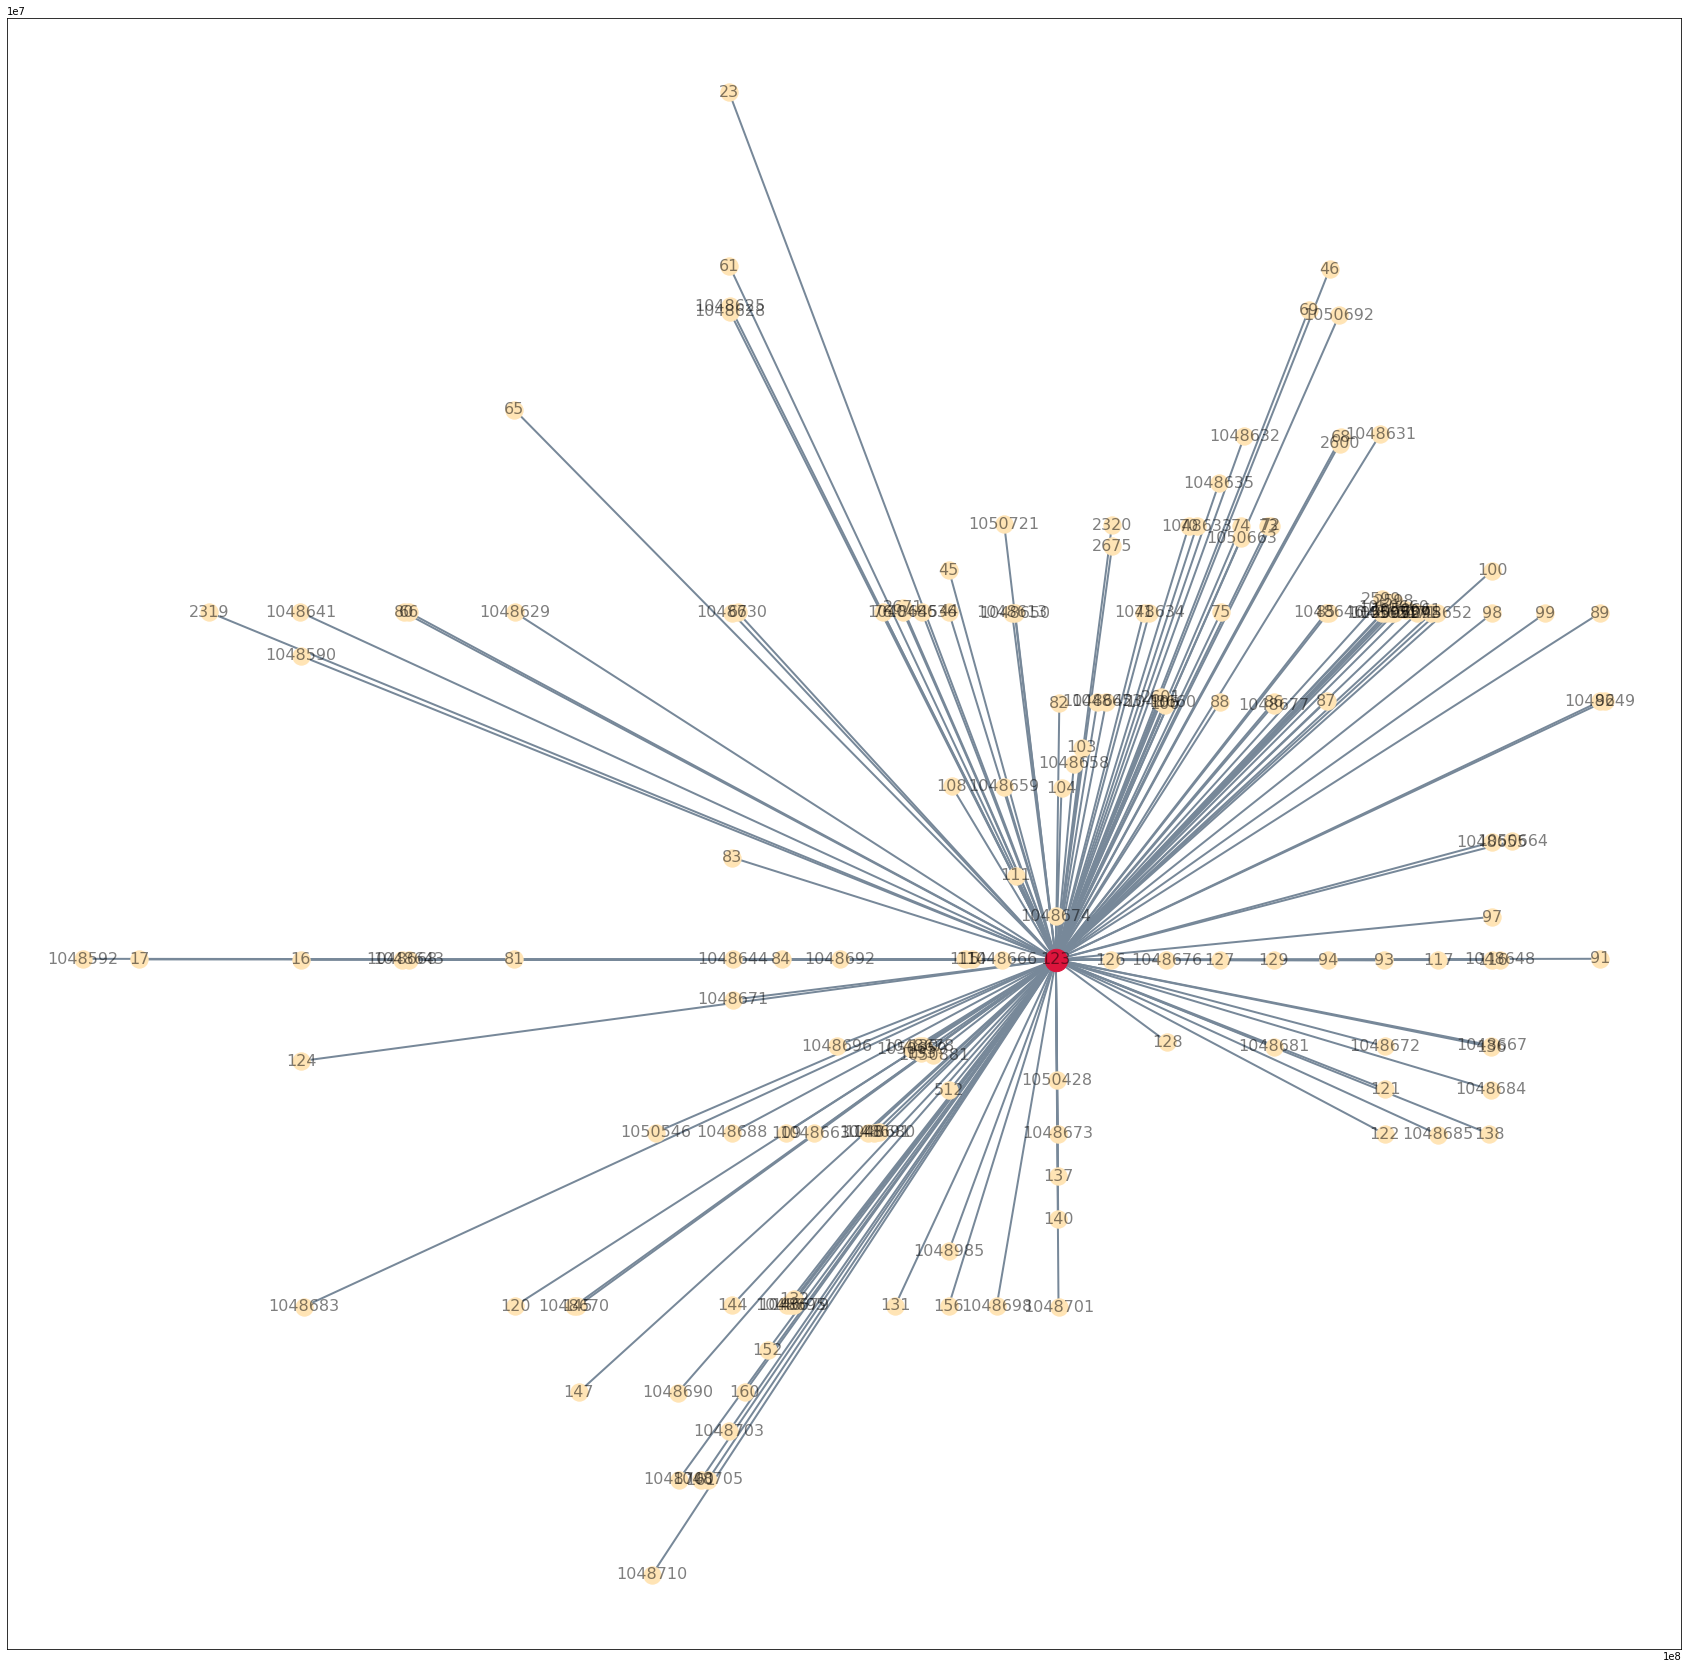

In [19]:
G.GraphandPlot()

## Here we run functionality2 and plotting!

What functionality would you like to run? 
2
Write the nodes, each one spaced from the other.  12 34 48 1048668
We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  
 1


<Figure size 432x288 with 0 Axes>

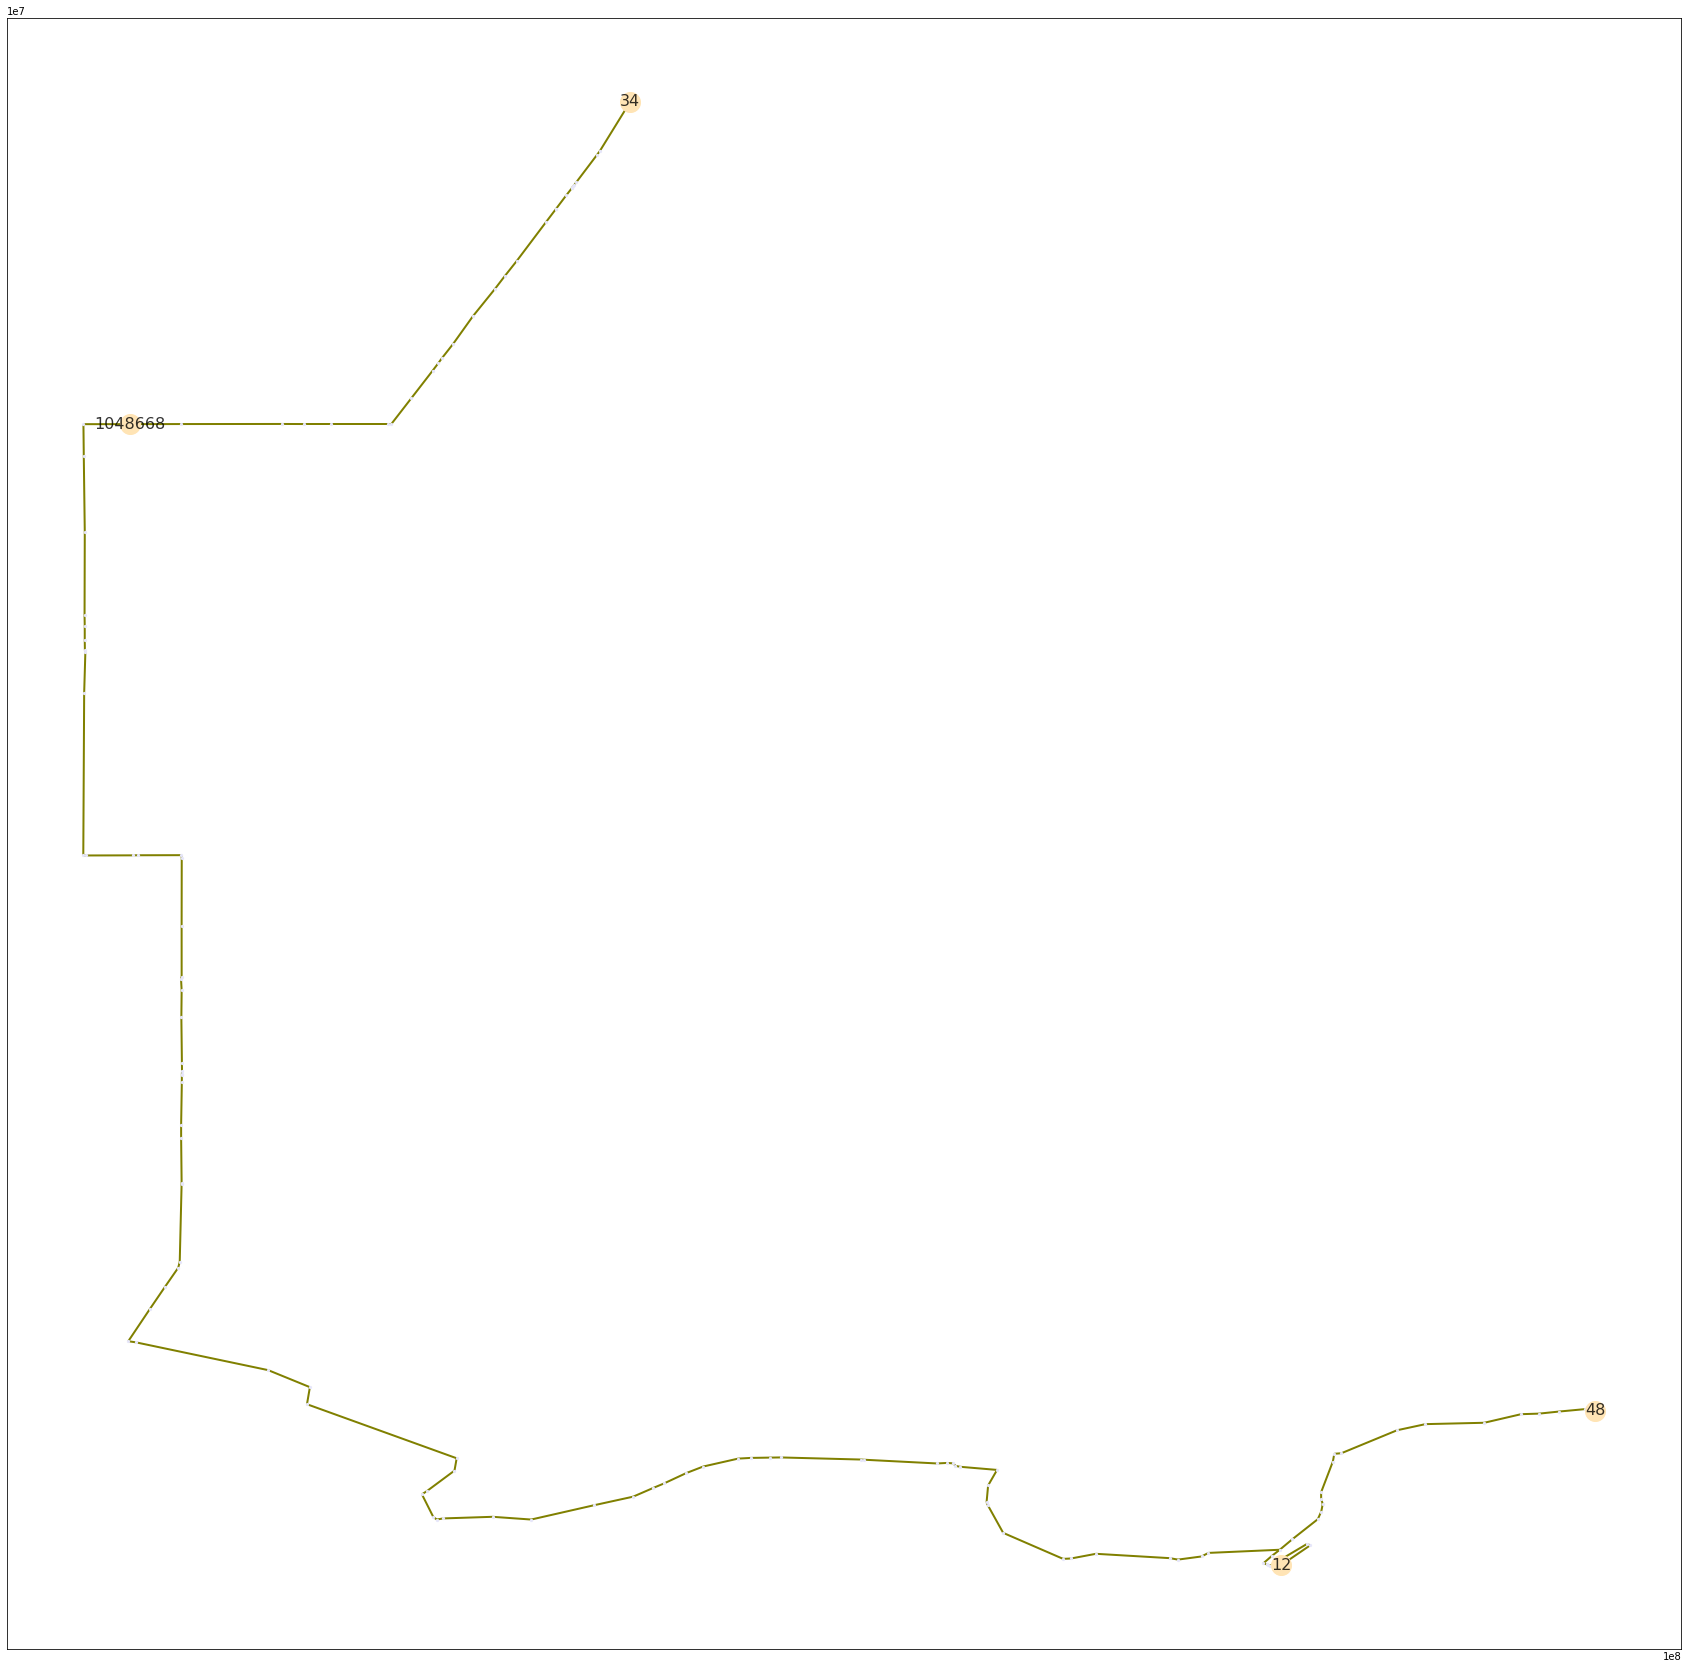

In [20]:
G.GraphandPlot()

What functionality would you like to run? 
2
Write the nodes, each one spaced from the other.  12 34 48 1048668
We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  
 2


<Figure size 432x288 with 0 Axes>

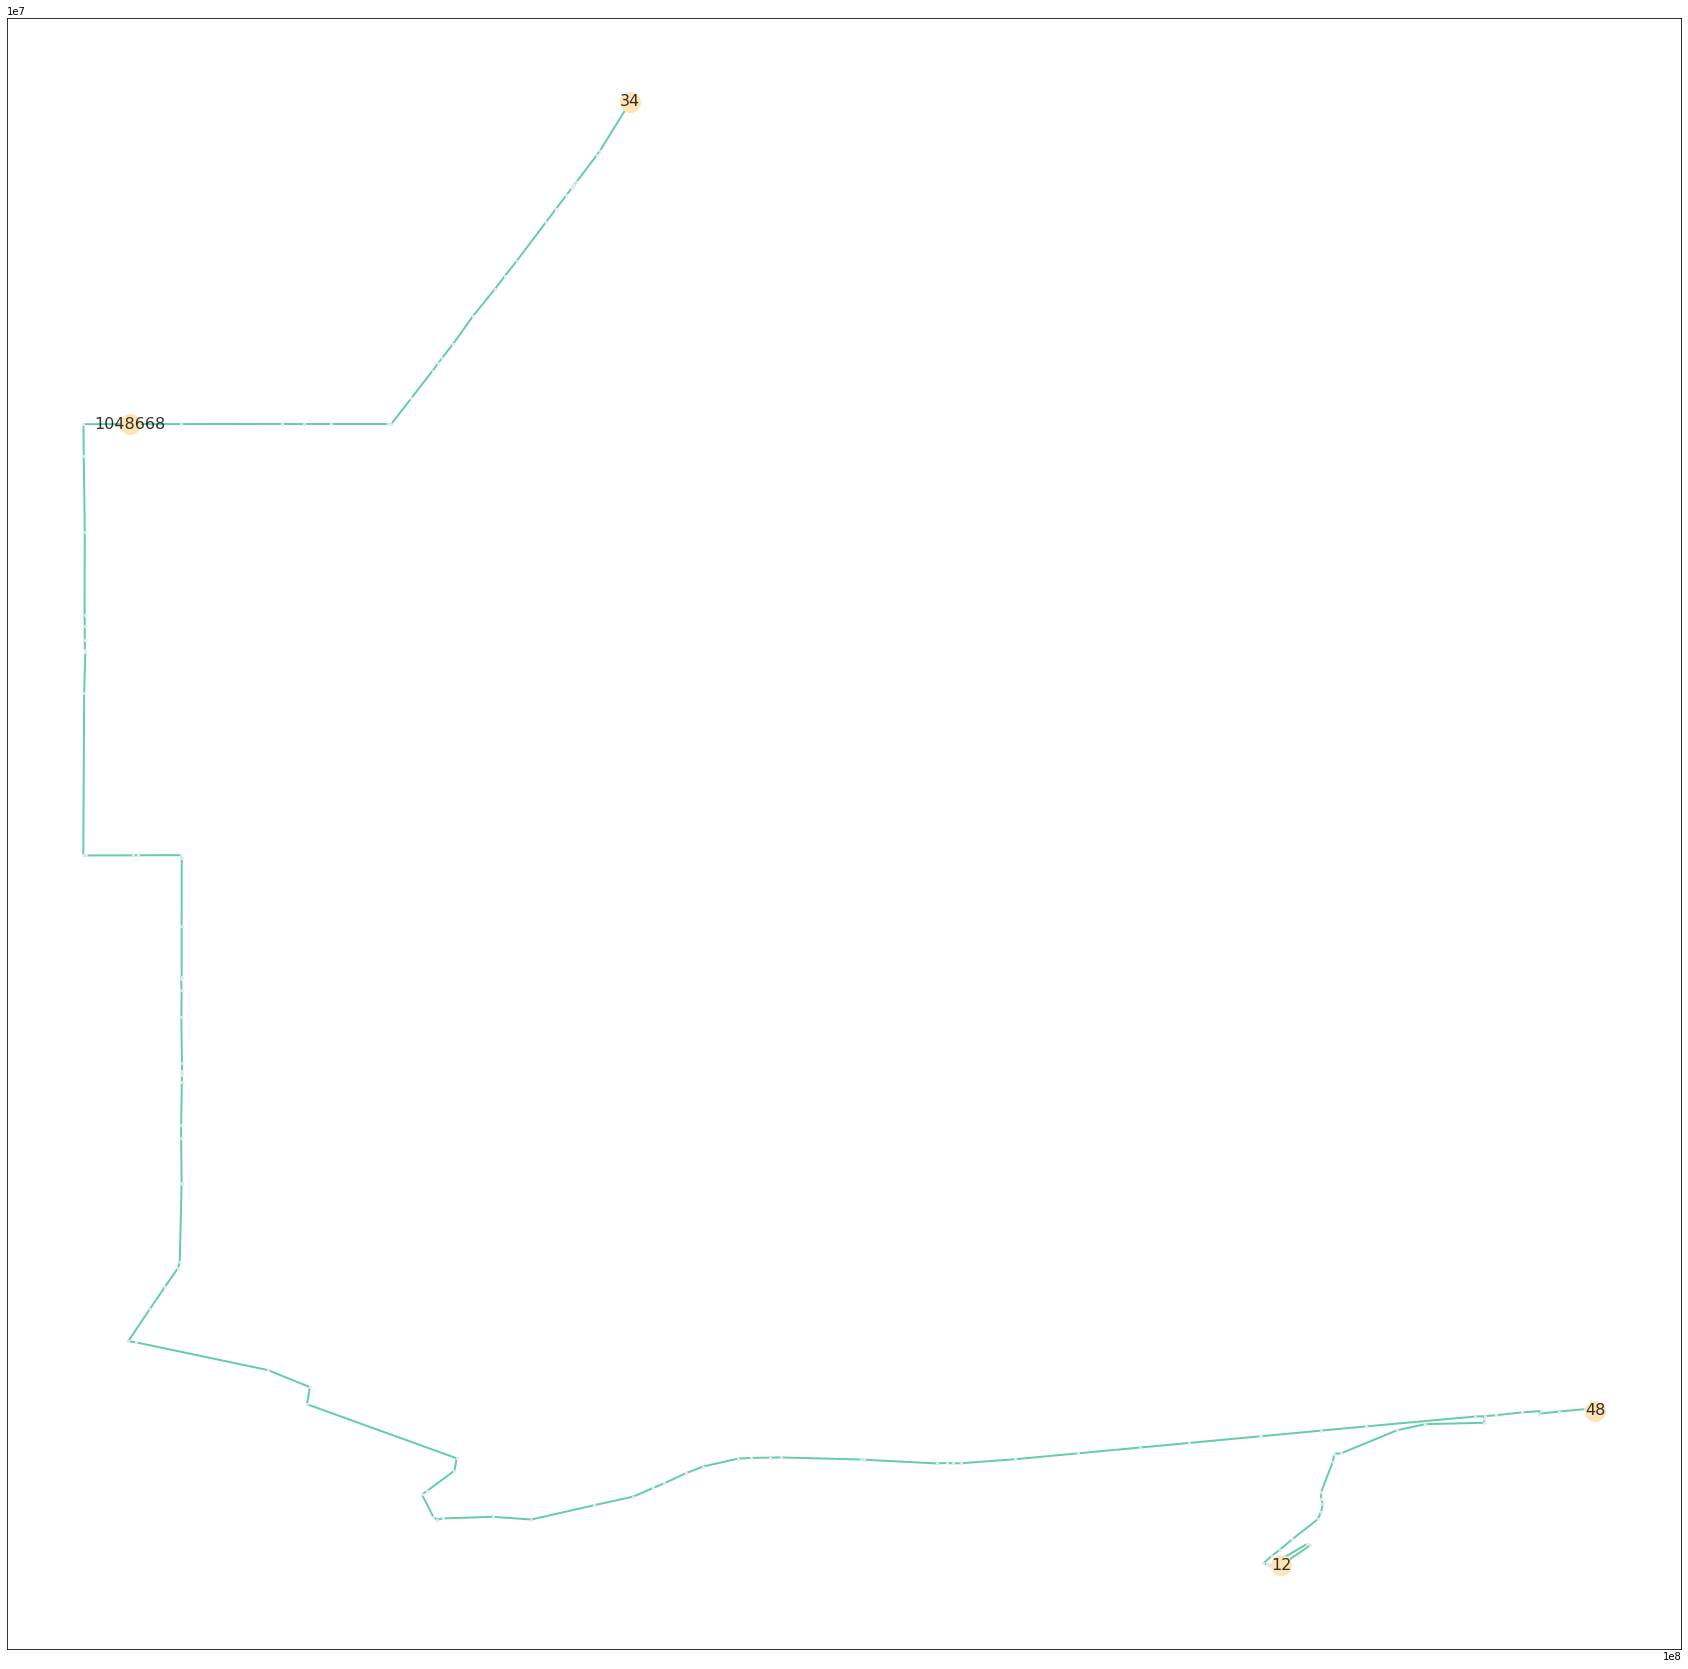

In [21]:
G.GraphandPlot()

In [9]:
G.GraphandPlot()

What functionality would you like to run? 
2
Write the nodes, each one spaced from the other.  12 48
We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  
 3


'There is no path'

## Here some examples for functionality3 and plotting :)

What functionality would you like to run? 
3
Write the number associated to the starting node.  
23
Write the nodes, each one spaced from the other.  
25 27 2319 1048661
We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  
 1


<Figure size 432x288 with 0 Axes>

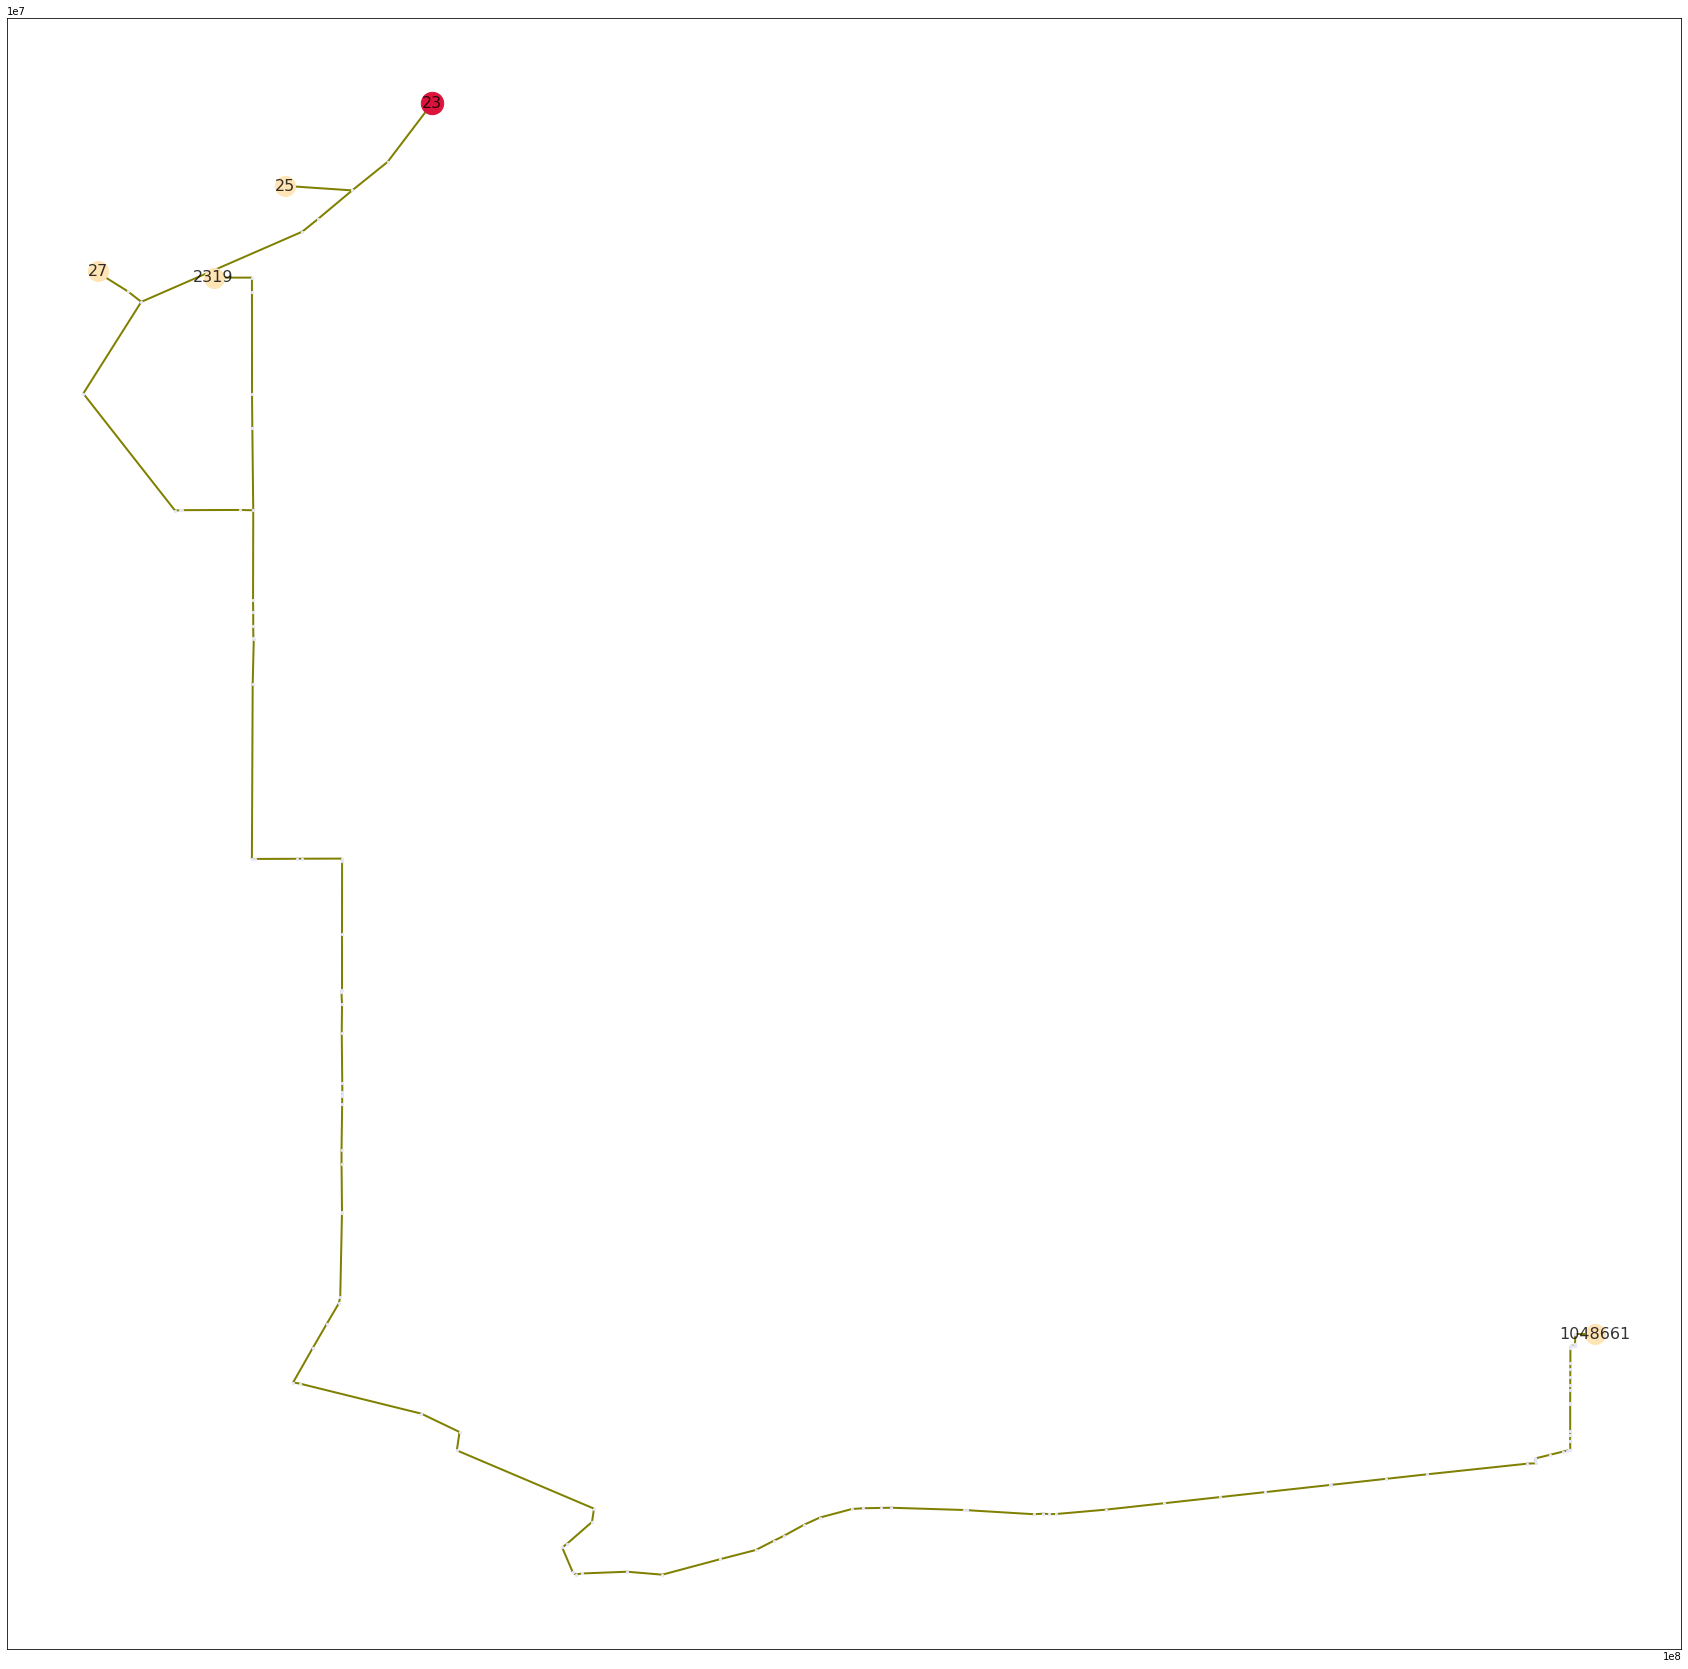

In [27]:
G.GraphandPlot()

What functionality would you like to run? 
3
Write the number associated to the starting node.  
25
Write the nodes, each one spaced from the other.  
2319 34 55 78 69
We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  
 2


<Figure size 432x288 with 0 Axes>

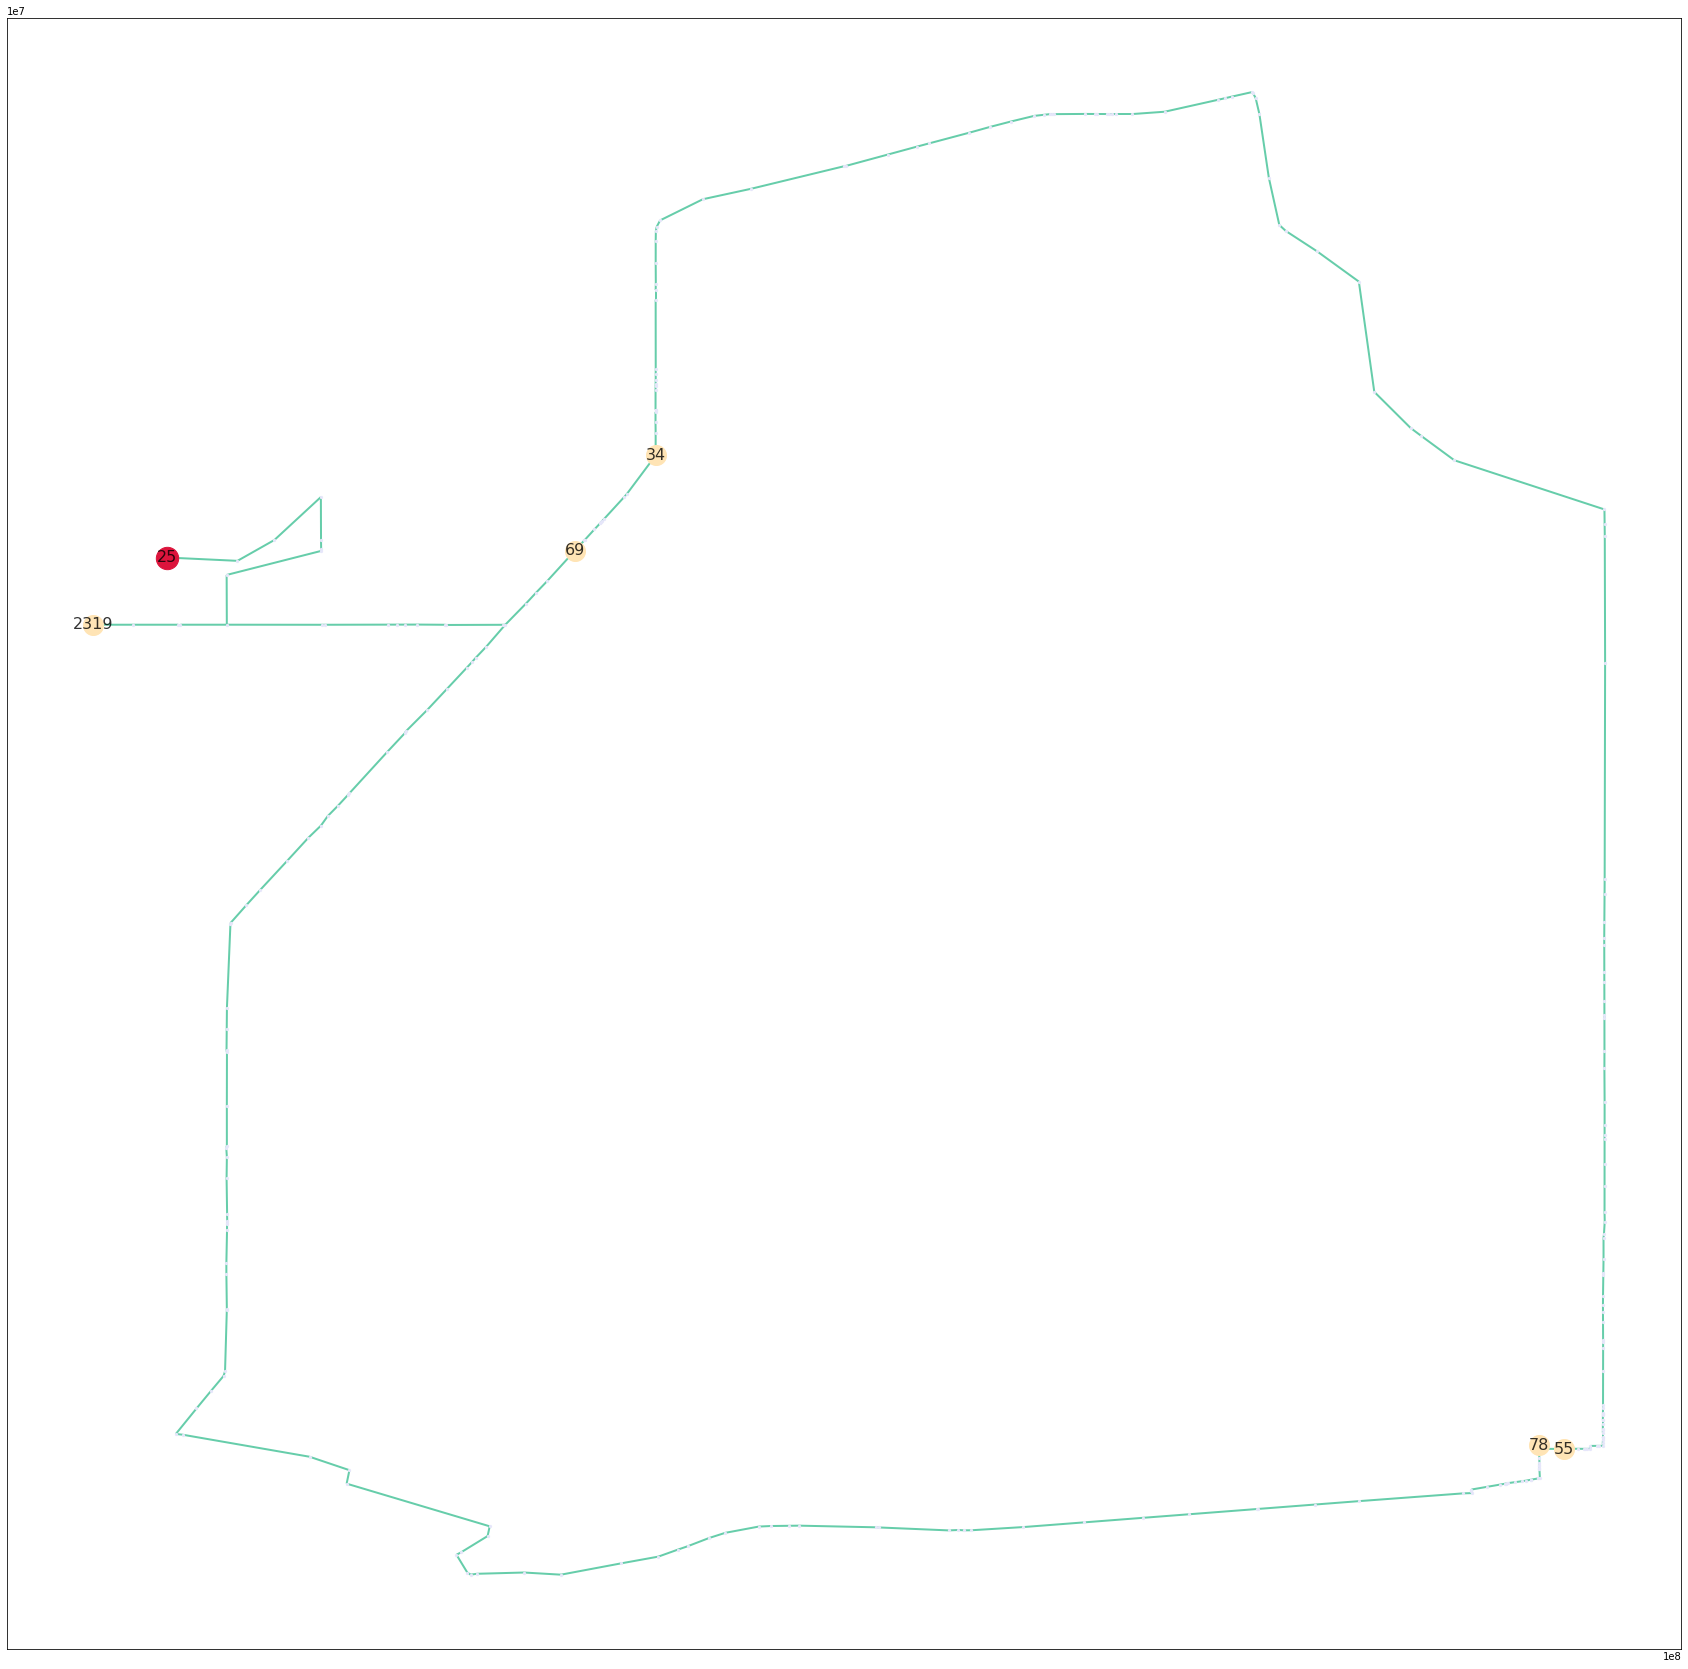

In [28]:
G.GraphandPlot() #being a ordered path, it makes perfectly sense this shape

What functionality would you like to run? 
3
Write the number associated to the starting node.  
1 
Write the nodes, each one spaced from the other.  
3
We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  
 3


<Figure size 432x288 with 0 Axes>

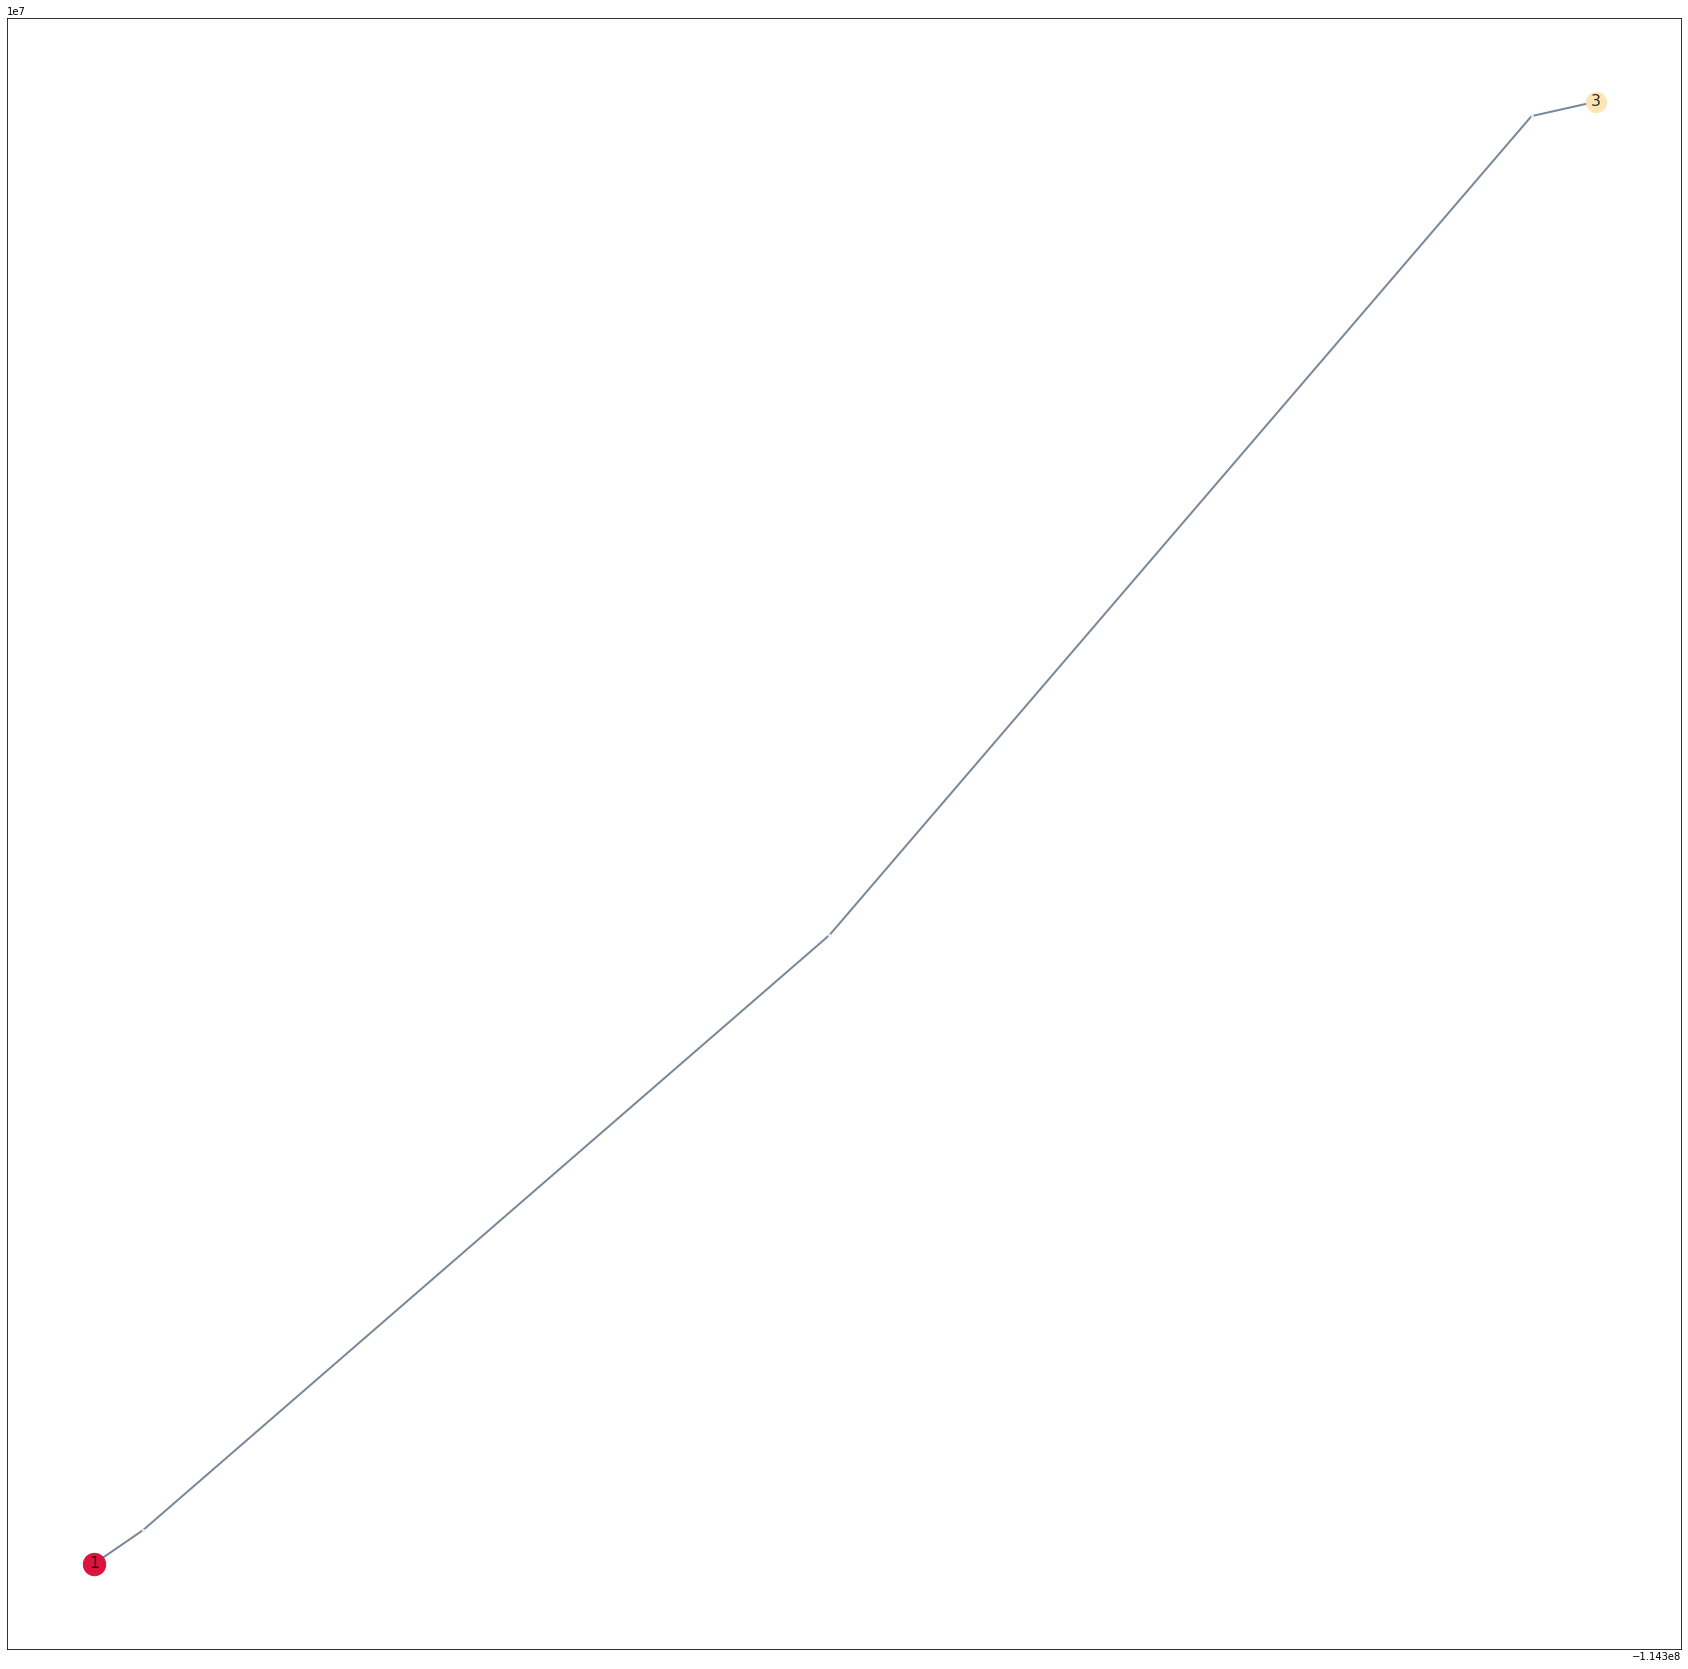

In [29]:
G.GraphandPlot()

## At last here is some examples with functionality4 and plotting.

What functionality would you like to run? 
4
Write the number associated to the starting node.  
1 
Write the nodes, each one spaced from the other, remember the last one will be always our end point.  
78 34 10293
We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  
 1


<Figure size 432x288 with 0 Axes>

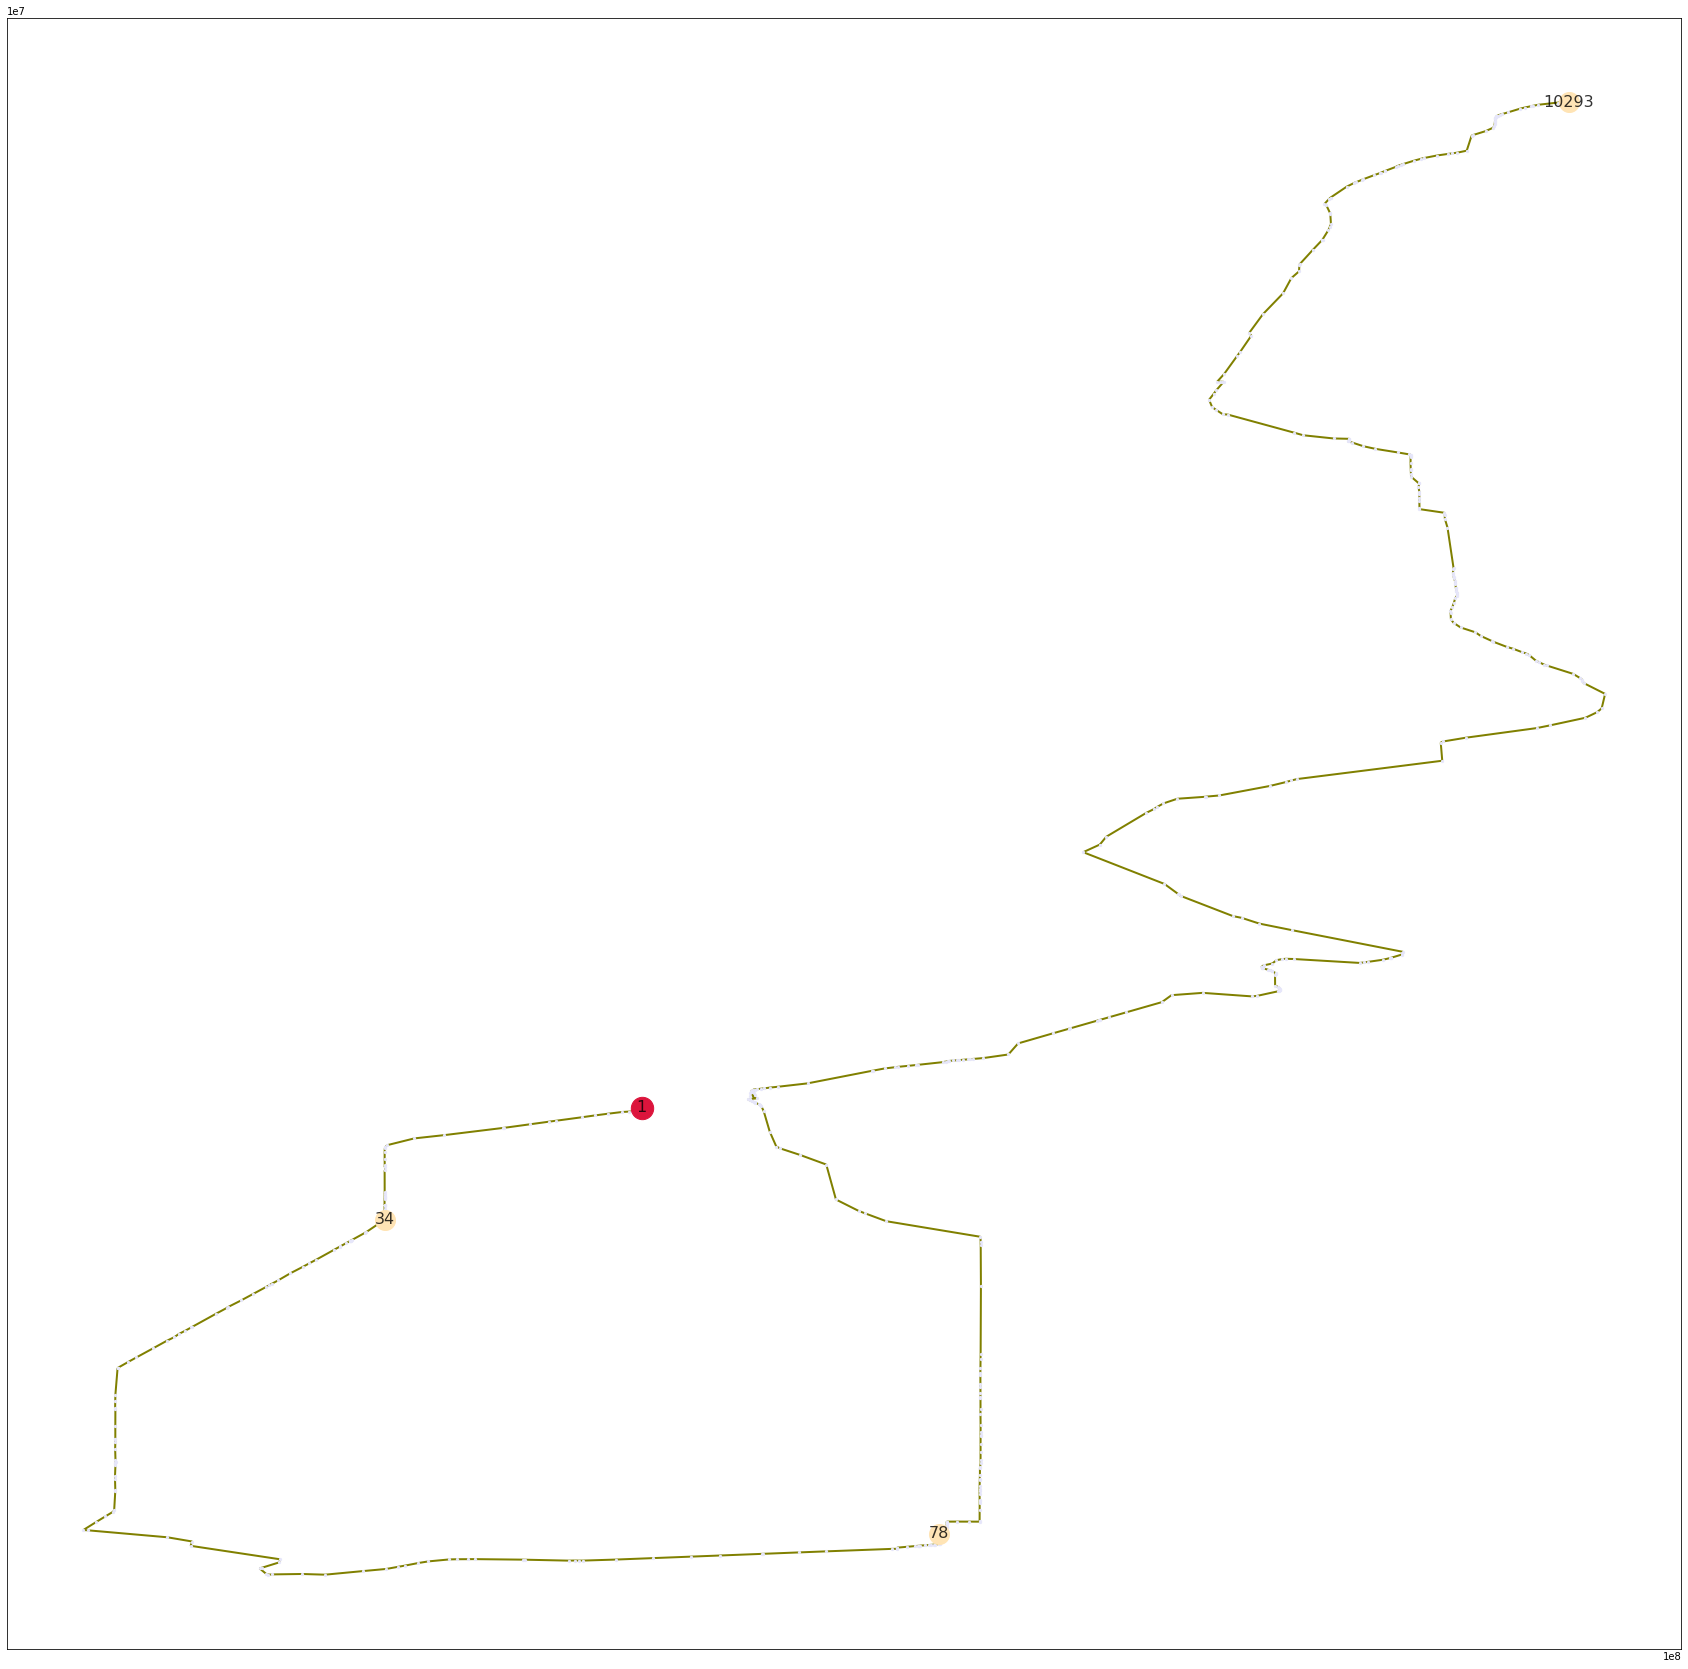

In [30]:
G.GraphandPlot()

What functionality would you like to run? 
4
Write the number associated to the starting node.  
34
Write the nodes, each one spaced from the other, remember the last one will be always our end point.  
78 23
We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  
 2


<Figure size 432x288 with 0 Axes>

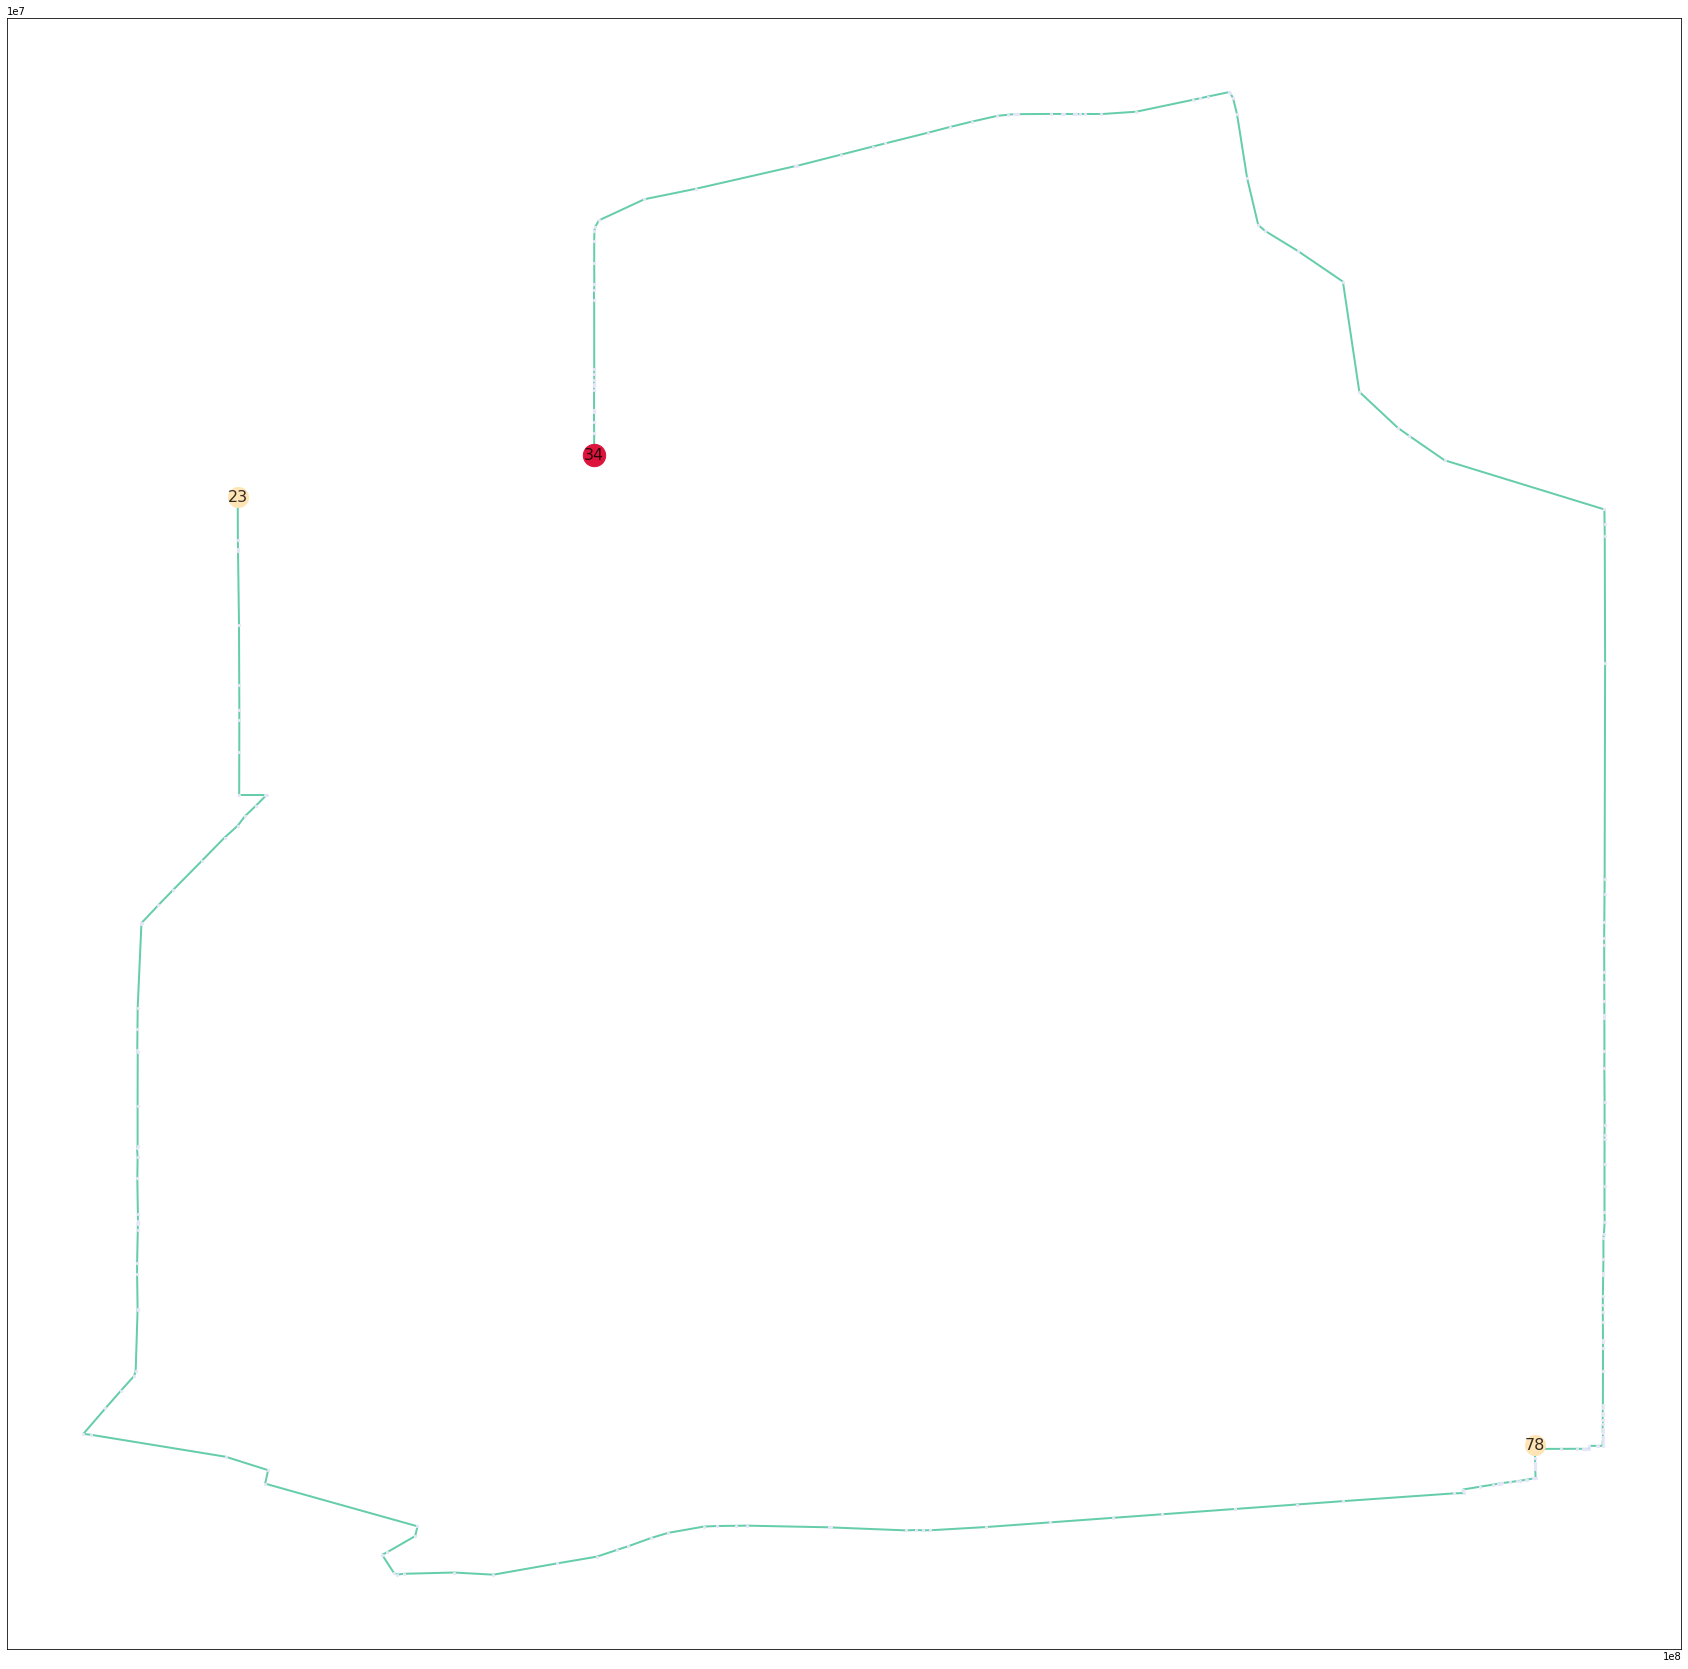

In [10]:
G.GraphandPlot()

### Eh eh her we also use the euristics, and looks good !)

What functionality would you like to run? 
4
Write the number associated to the starting node.  
1
Write the nodes, each one spaced from the other, remember the last one will be always our end point.  
2 3 4 5 6 7 8
We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  
 3
The nodes are more than 7, so we use an euristic approach based on random samples, that will give an approximate local minimum for our datasets


<Figure size 432x288 with 0 Axes>

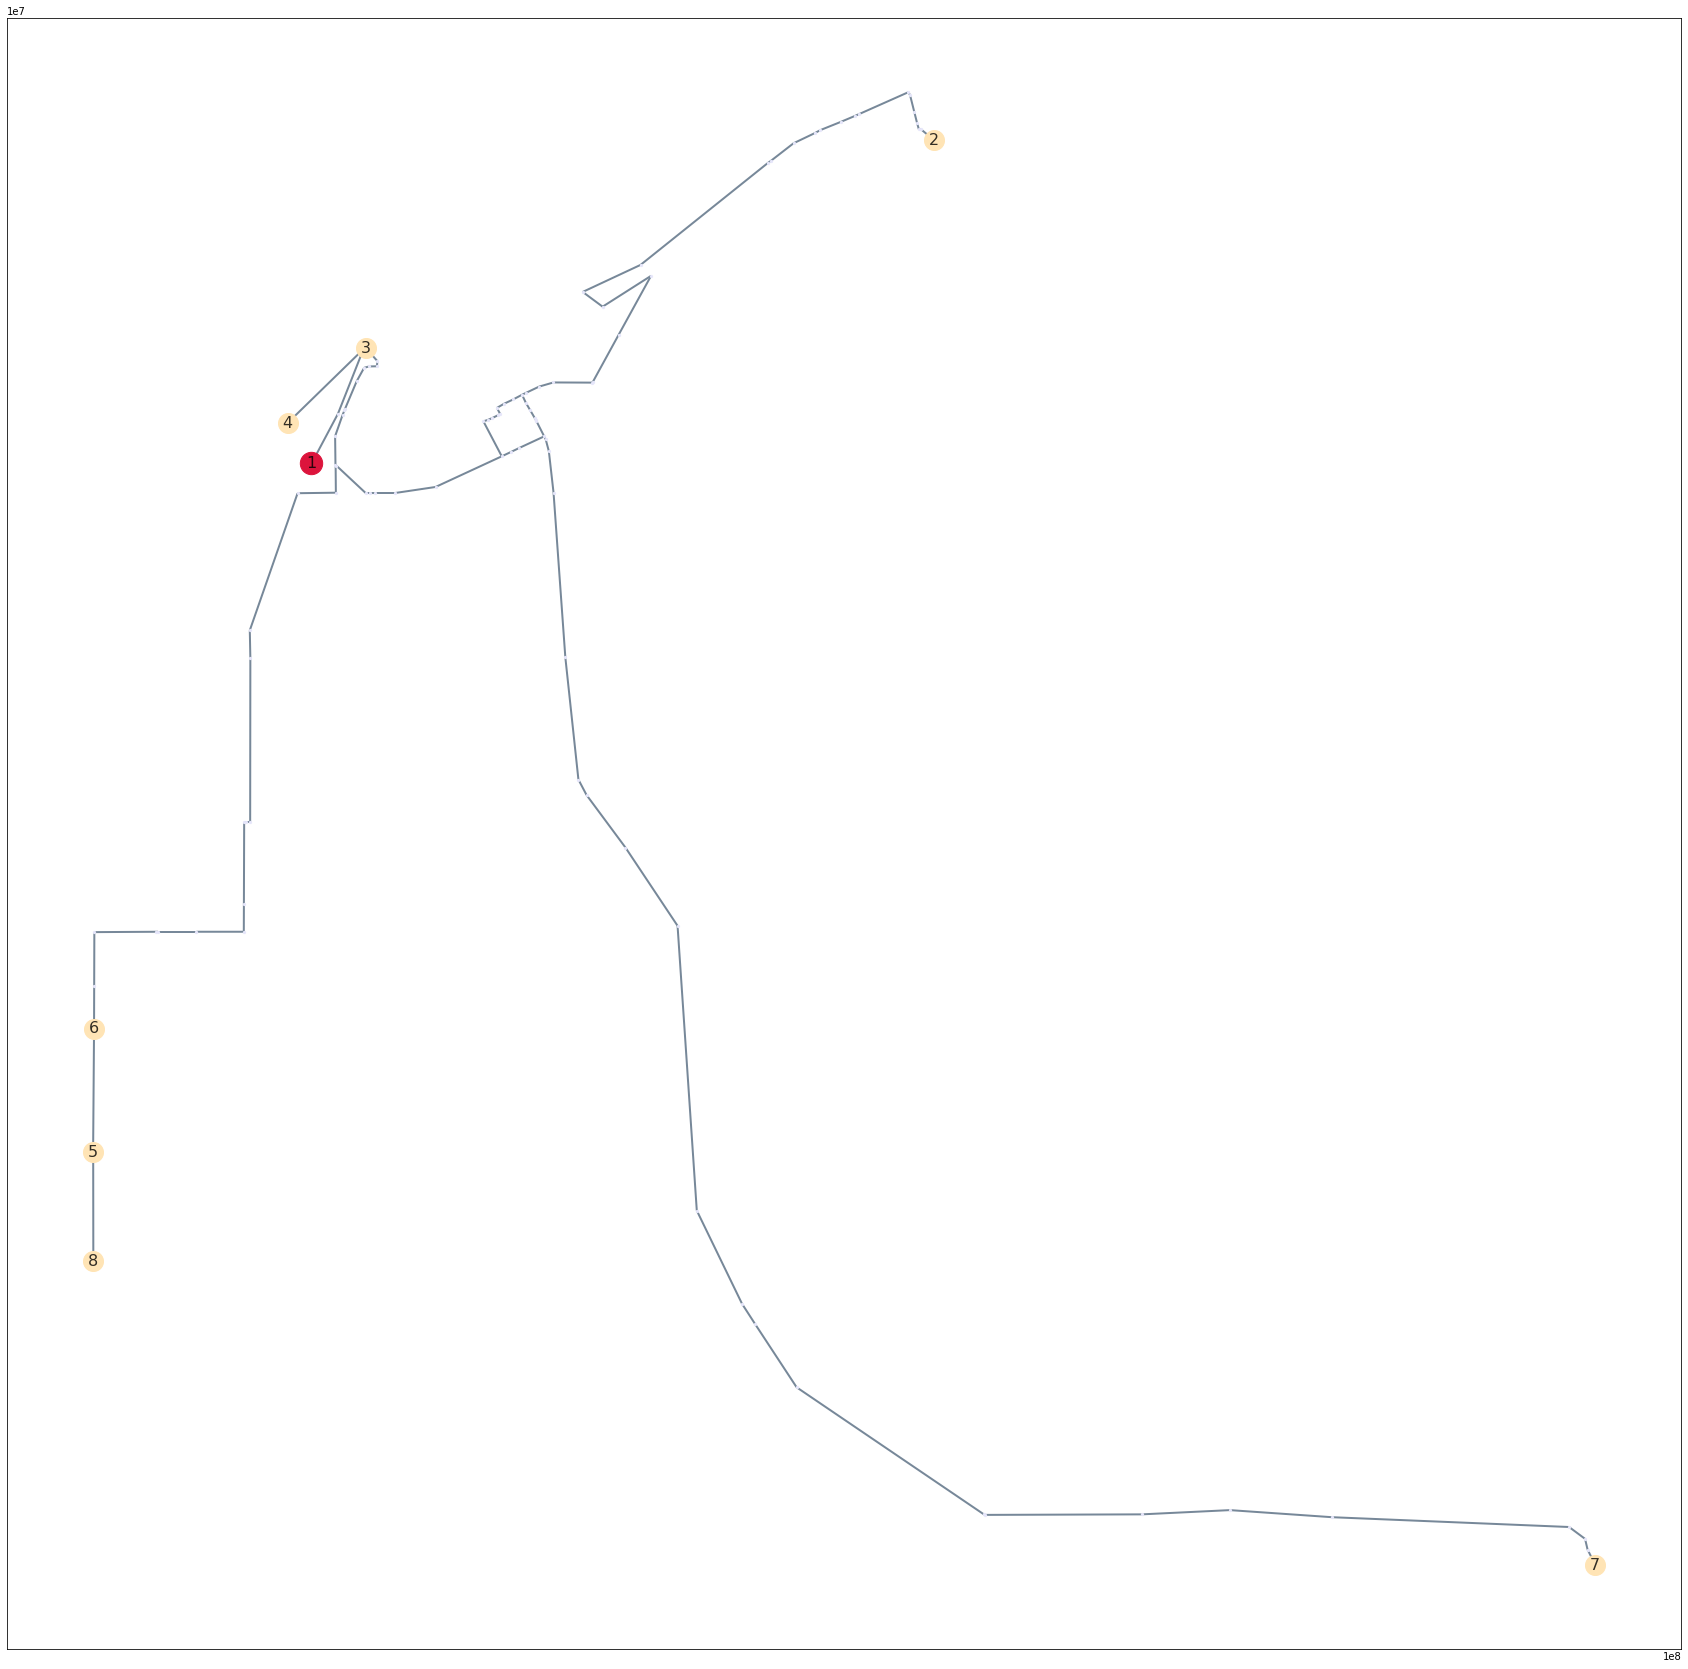

In [11]:
G.GraphandPlot()